In [64]:
import pandas as pd
import sys
# from pandas import datetools
import datetime
from datetime import timedelta
import os
# import import_ipynb
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

filedir = '/Users/santamag/Desktop/GUILLEM/wrkng_dirs_clean/growthCurves/'
gcExcels = ['010720GlycerolGrowthCurve_Hildi.xlsx', 
            '010720GlycerolGrowthCurve_Maurice.xlsx', 
            '011520GlycerolGrowthCurve_Hildi.xlsx',
            '011520GlycerolGrowthCurve_Maurice.xlsx',
            '012120GlycerolGrowthCurve_Hildi.xlsx',
            '012120GlycerolGrowthCurve_Spark.xlsx',
            '030420GlycerolGrowthCurve_Hildi.xlsx',
            '031320SuccinateGrowthCurve_Maurice.xlsx',
            '031320Cas_casSuccGrowthCurve_Hildi.xlsx']

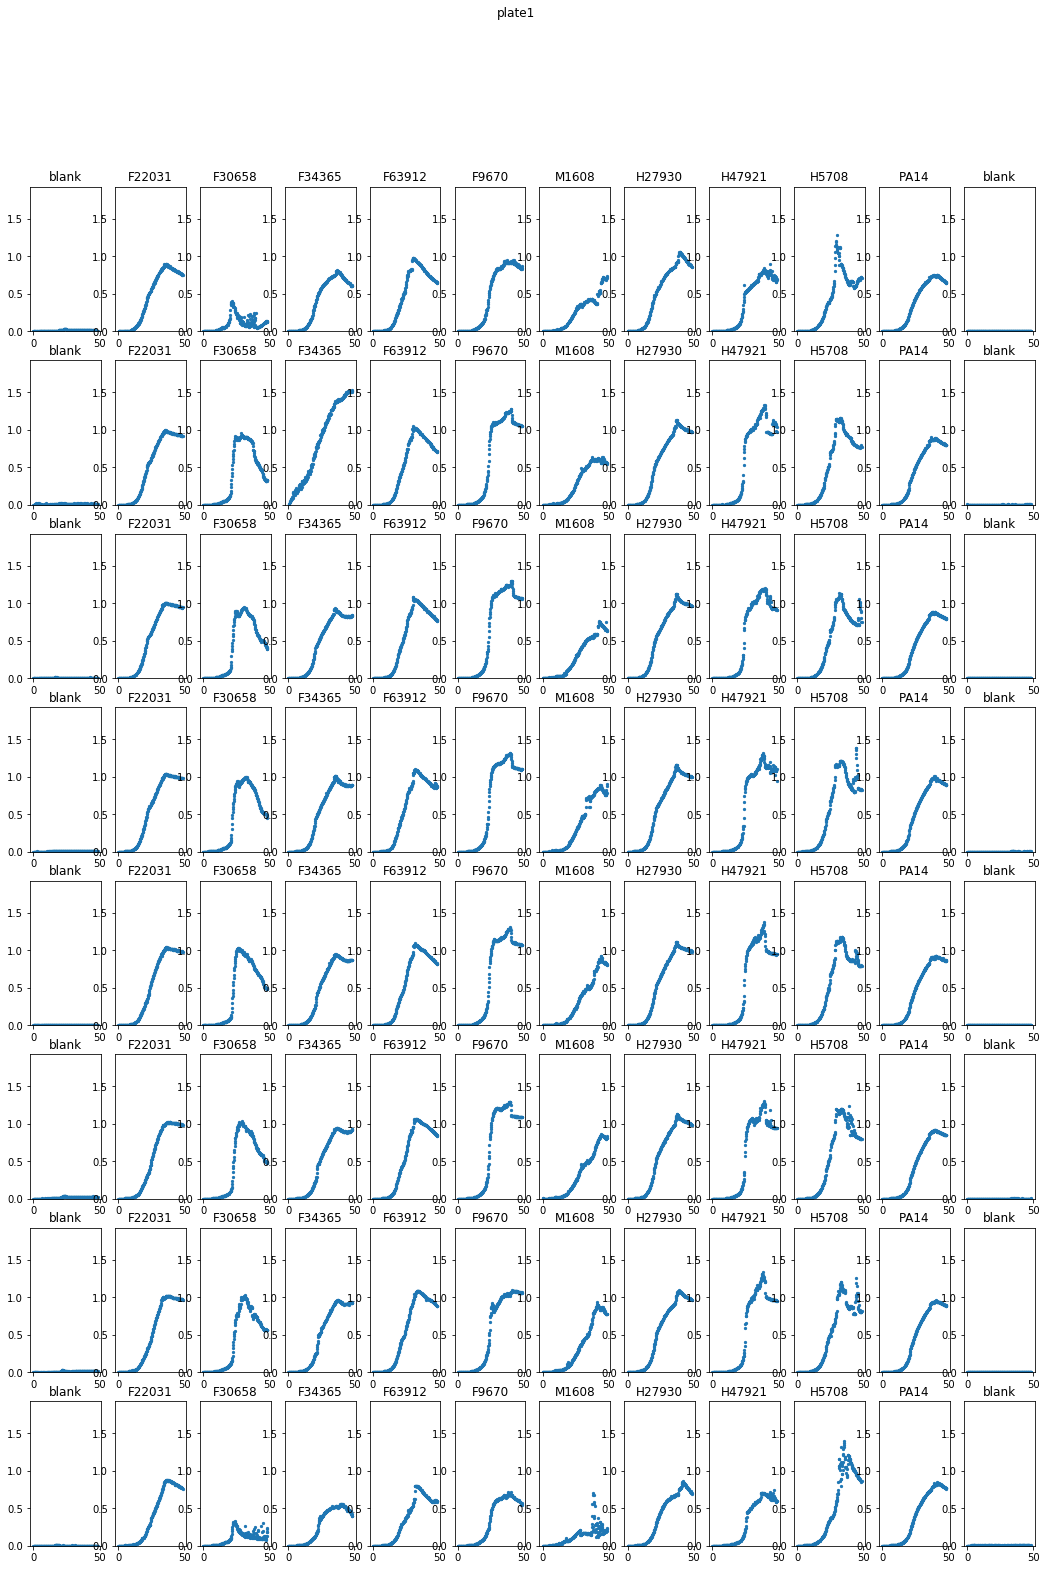

In [65]:
# Plate 1
%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[0],header=None, names=None)
G1 = SinglePlate.processExcel(G1)
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('F22031', 'F30658', 'F34365', 'F63912', 'F9670', 'M1608', 'H27930', 'H47921','H5708', 'PA14')
G1 = SinglePlate.renameWellByRowCol(G1, row1,['1', '12'], 'blank')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[2])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'5', strains[3])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'6', strains[4])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'7', strains[5])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'8', strains[6])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'9', strains[7])
G1 = SinglePlate.renameWellByRowCol(G1, row1, ['10'], strains[8])
G1 = SinglePlate.renameWellByRowCol(G1, row1,['11'], strains[9])

SinglePlate.plotRawData(G1, 'plate1')

In [66]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)


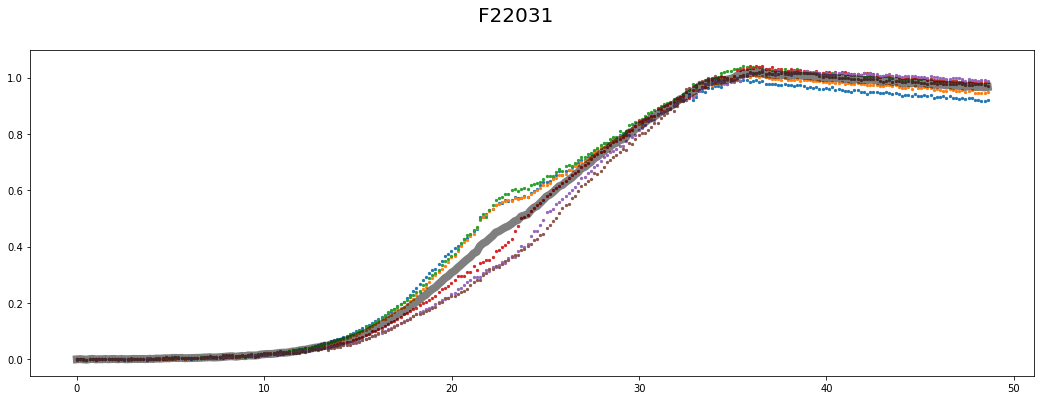

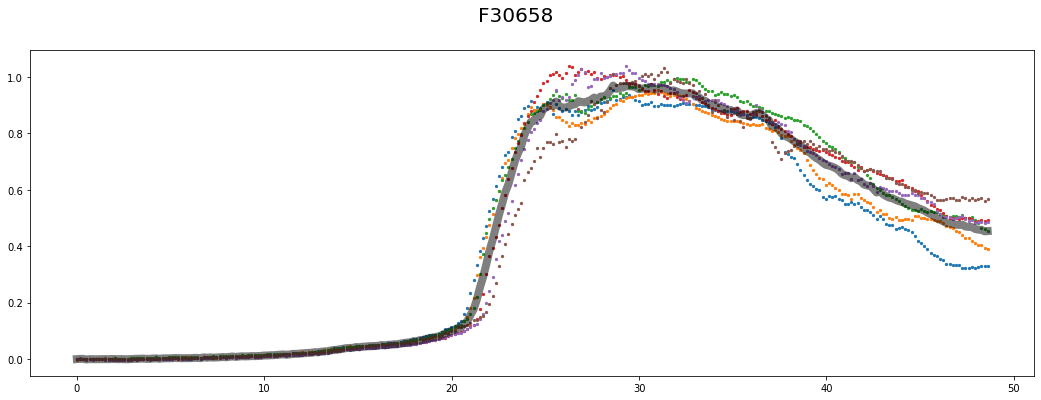

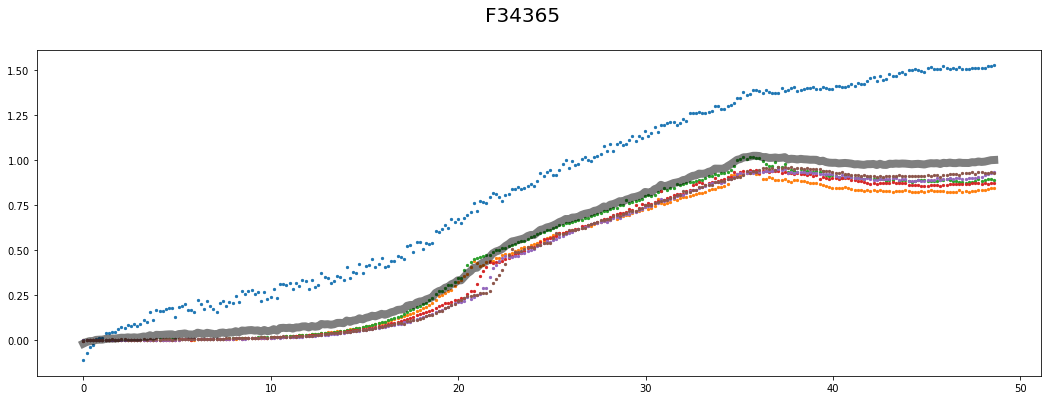

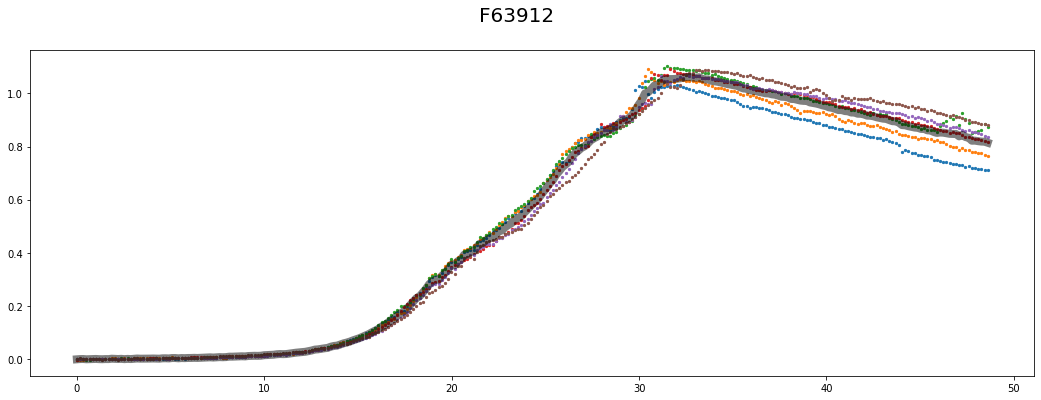

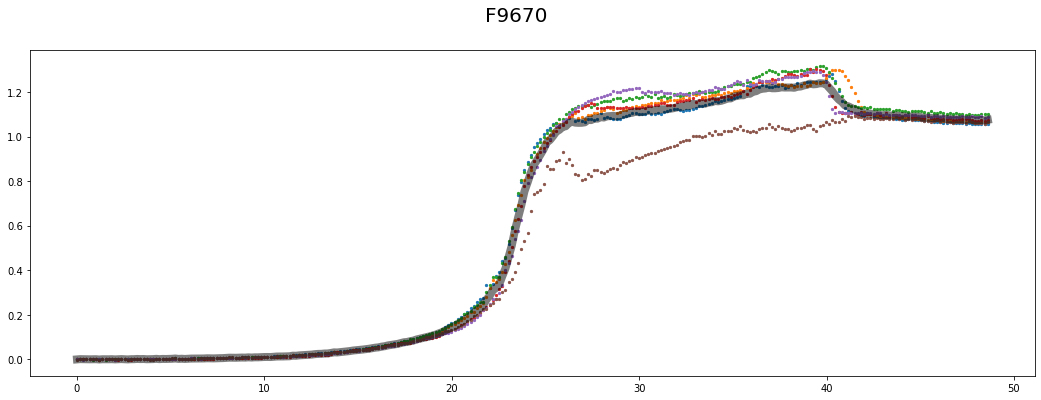

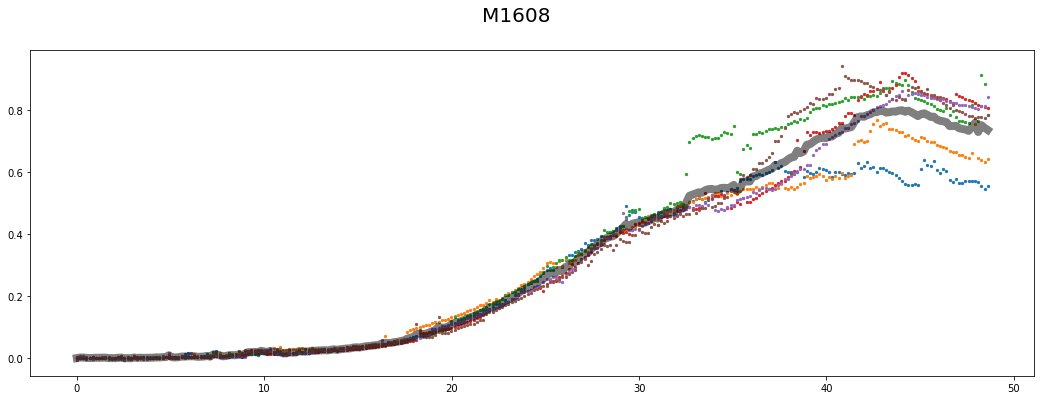

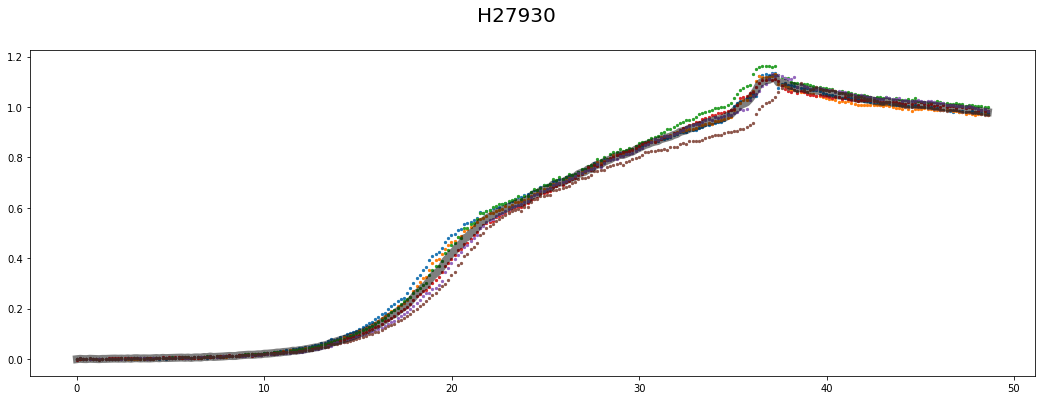

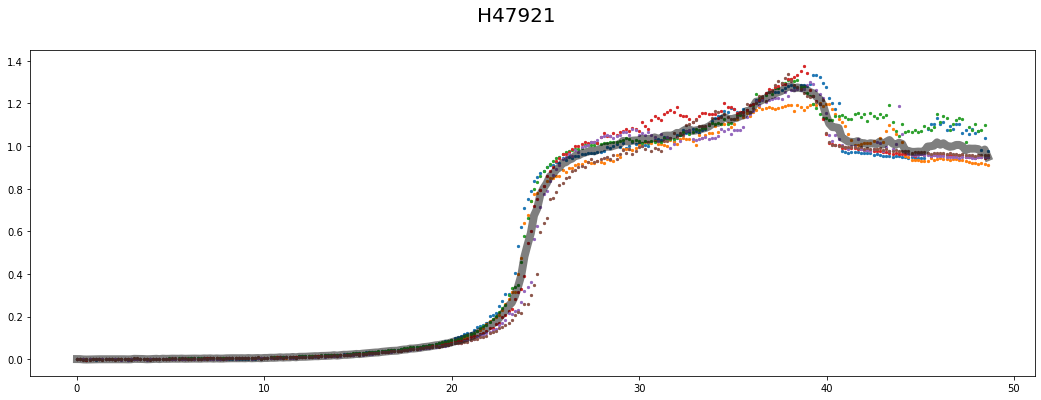

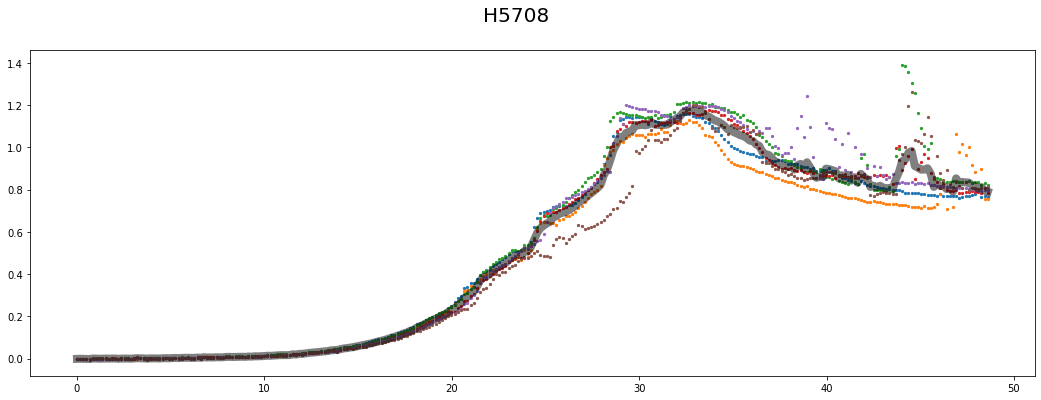

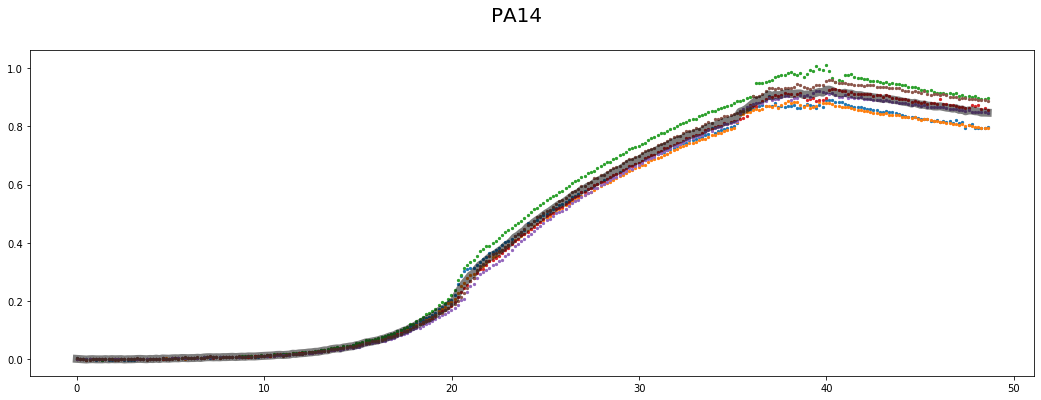

In [67]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
    plt.savefig(st+'.pdf', transparent=True)
# T1 = T1.rename(columns={'Time', strains})


In [68]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[0])+"mean.xlsx")

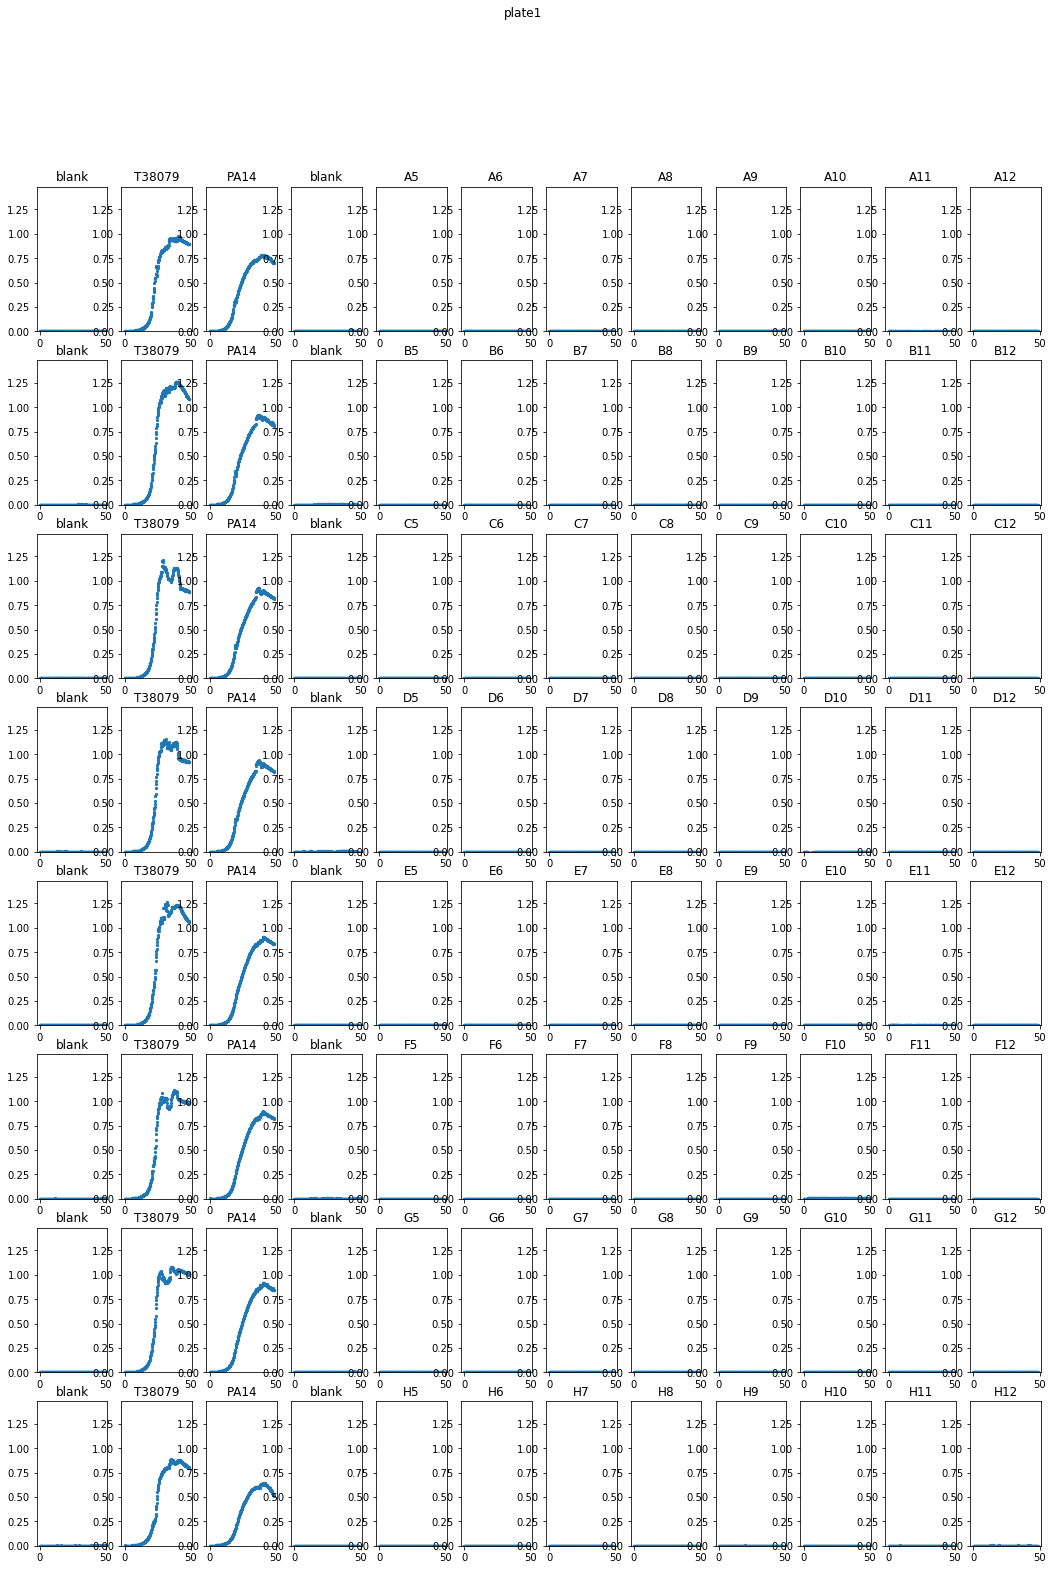

In [69]:
# Plate 2
%run biologFunctions.ipynb
G2 = pd.read_excel(filedir+gcExcels[1],header=None, names=None)
G2 = SinglePlate.processExcel(G2)
G2 = SinglePlate.subtractFirstPoint(G2)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('T38079', 'PA14')
G2 = SinglePlate.renameWellByRowCol(G2, row1,['1', '4'], 'blank')
G2 = SinglePlate.renameWellByRowCol(G2, row1,'2', strains[0])
G2 = SinglePlate.renameWellByRowCol(G2, row1,'3', strains[1])

SinglePlate.plotRawData(G2, 'plate1')

In [70]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG2=G2.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G2, s, col2keep)
    newG2=pd.concat([newG2, sf],axis=1)


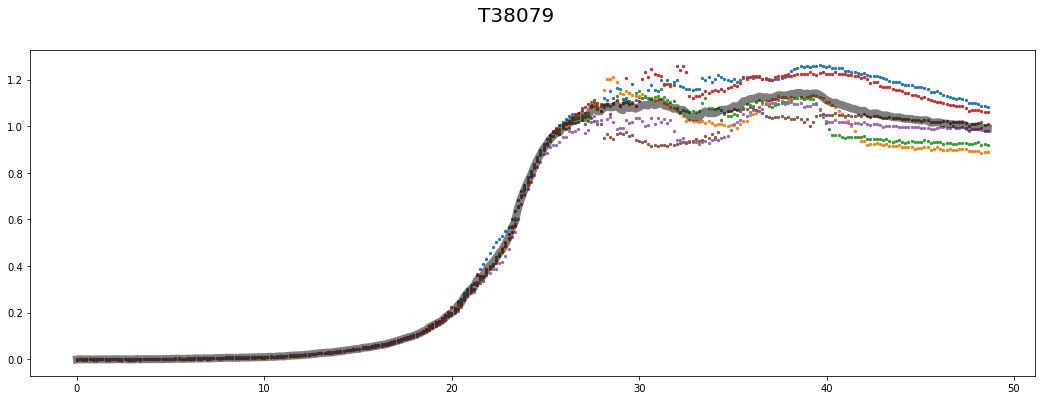

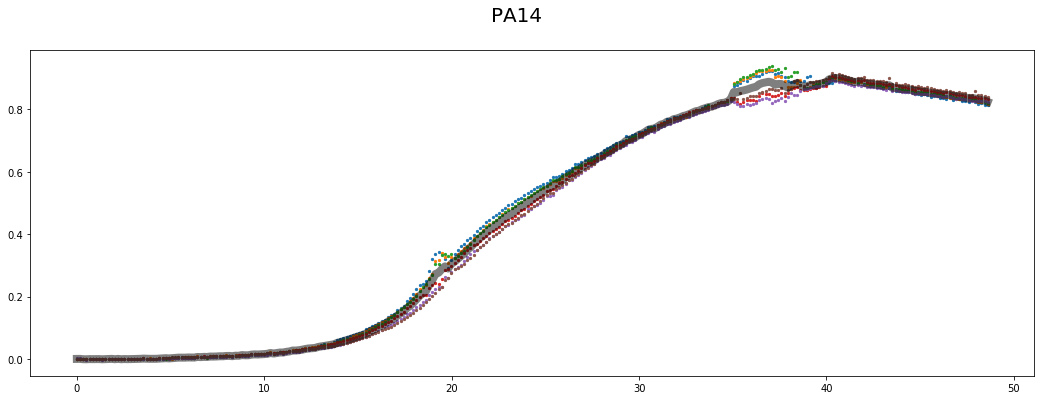

In [71]:
## print one figure for all replicates of each strain
dt = newG2.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG2.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [72]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[1])+"mean.xlsx")

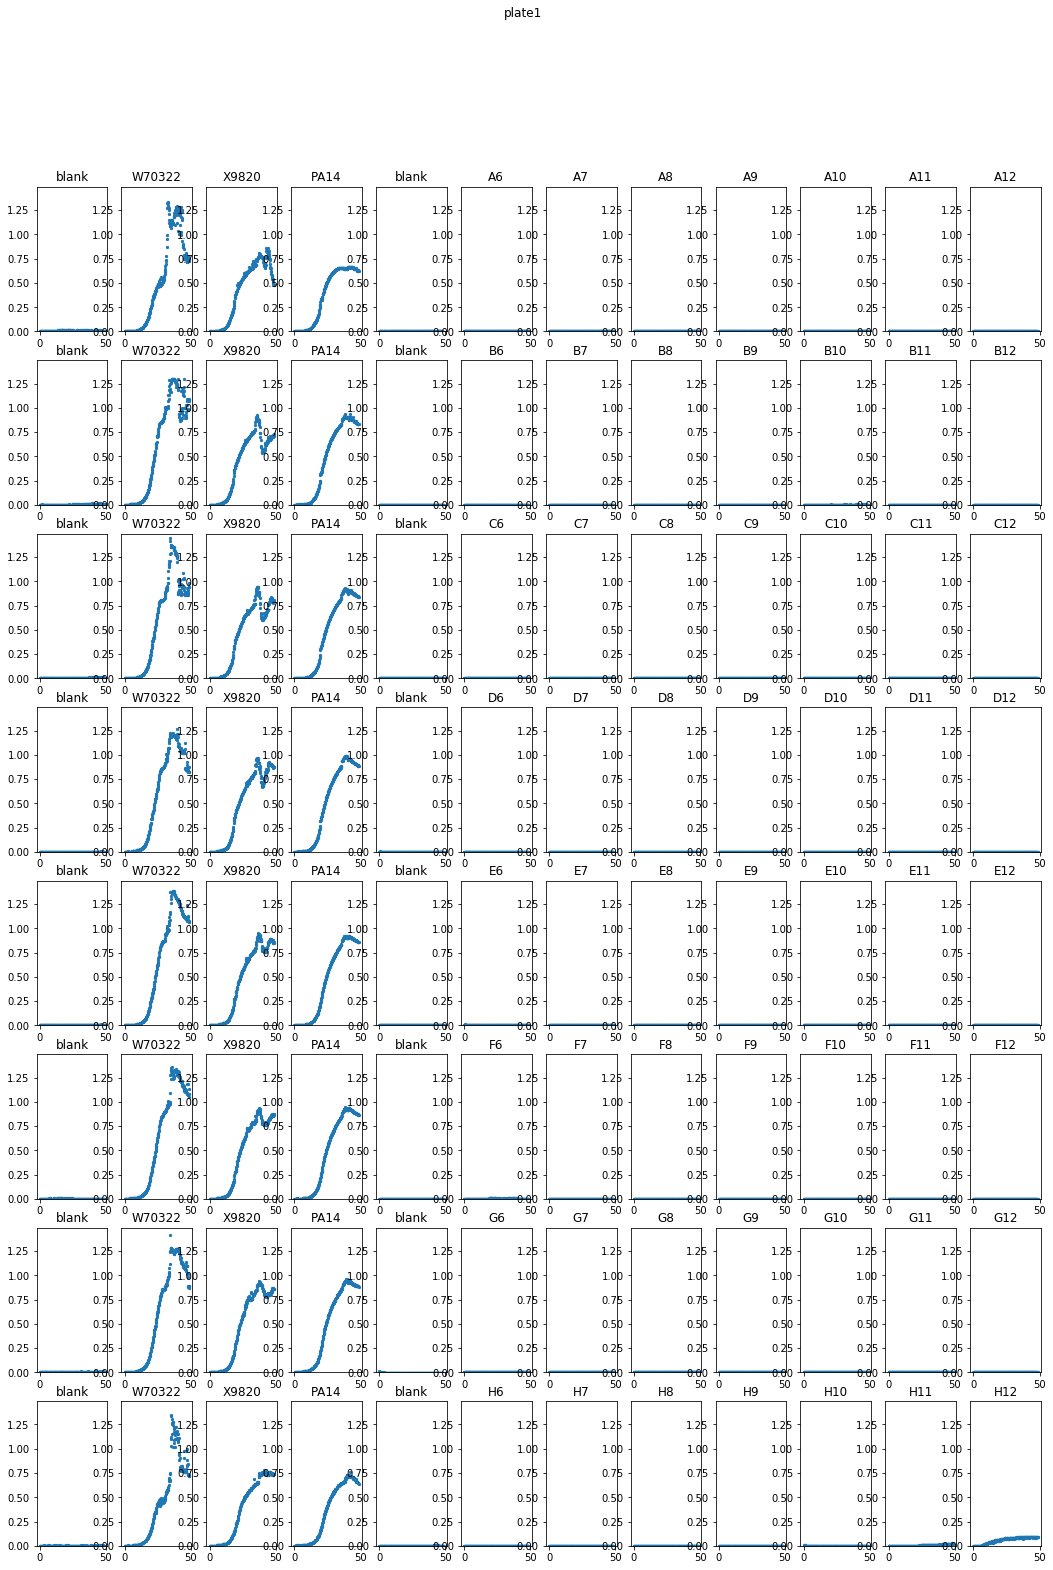

In [73]:
# Plate 3
%run biologFunctions.ipynb
G3 = pd.read_excel(filedir+gcExcels[2],header=None, names=None)
G3 = SinglePlate.processExcel(G3)
G3 = SinglePlate.subtractFirstPoint(G3)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('W70322', 'X9820', 'PA14')
G3 = SinglePlate.renameWellByRowCol(G3, row1,['1', '5'], 'blank')
G3 = SinglePlate.renameWellByRowCol(G3, row1,'2', strains[0])
G3 = SinglePlate.renameWellByRowCol(G3, row1,'3', strains[1])
G3 = SinglePlate.renameWellByRowCol(G3, row1,'4', strains[2])

SinglePlate.plotRawData(G3, 'plate1')

In [74]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG3=G3.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G3, s, col2keep)
    newG3=pd.concat([newG3, sf],axis=1)


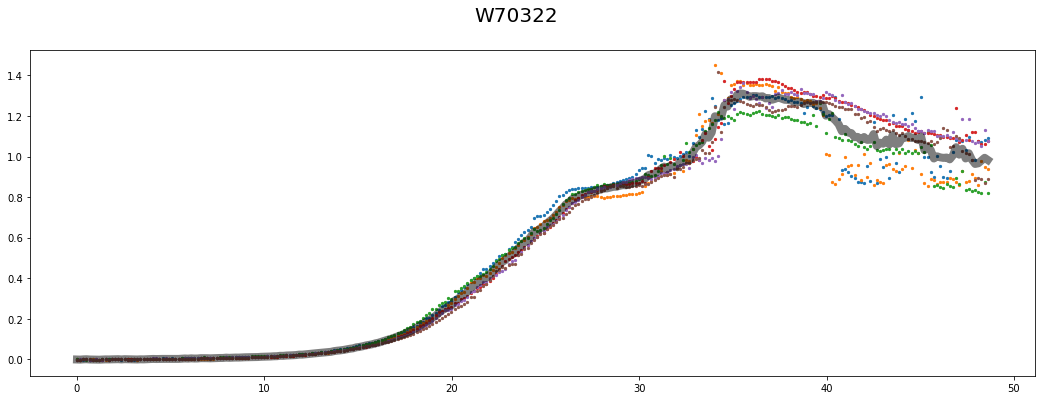

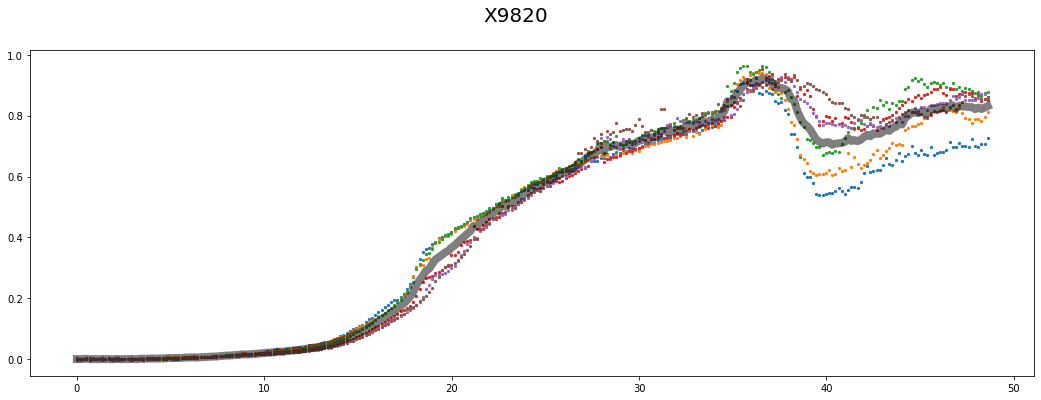

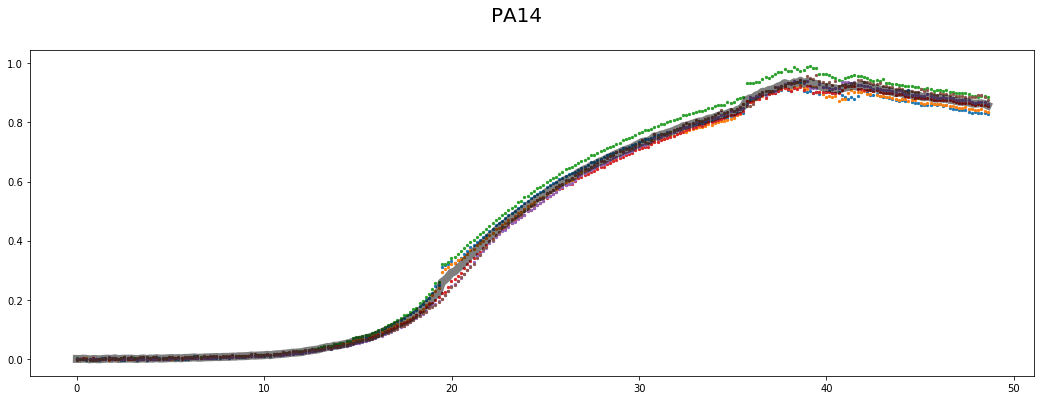

In [75]:
## print one figure for all replicates of each strain
dt = newG3.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG3.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [76]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[2])+"mean.xlsx")

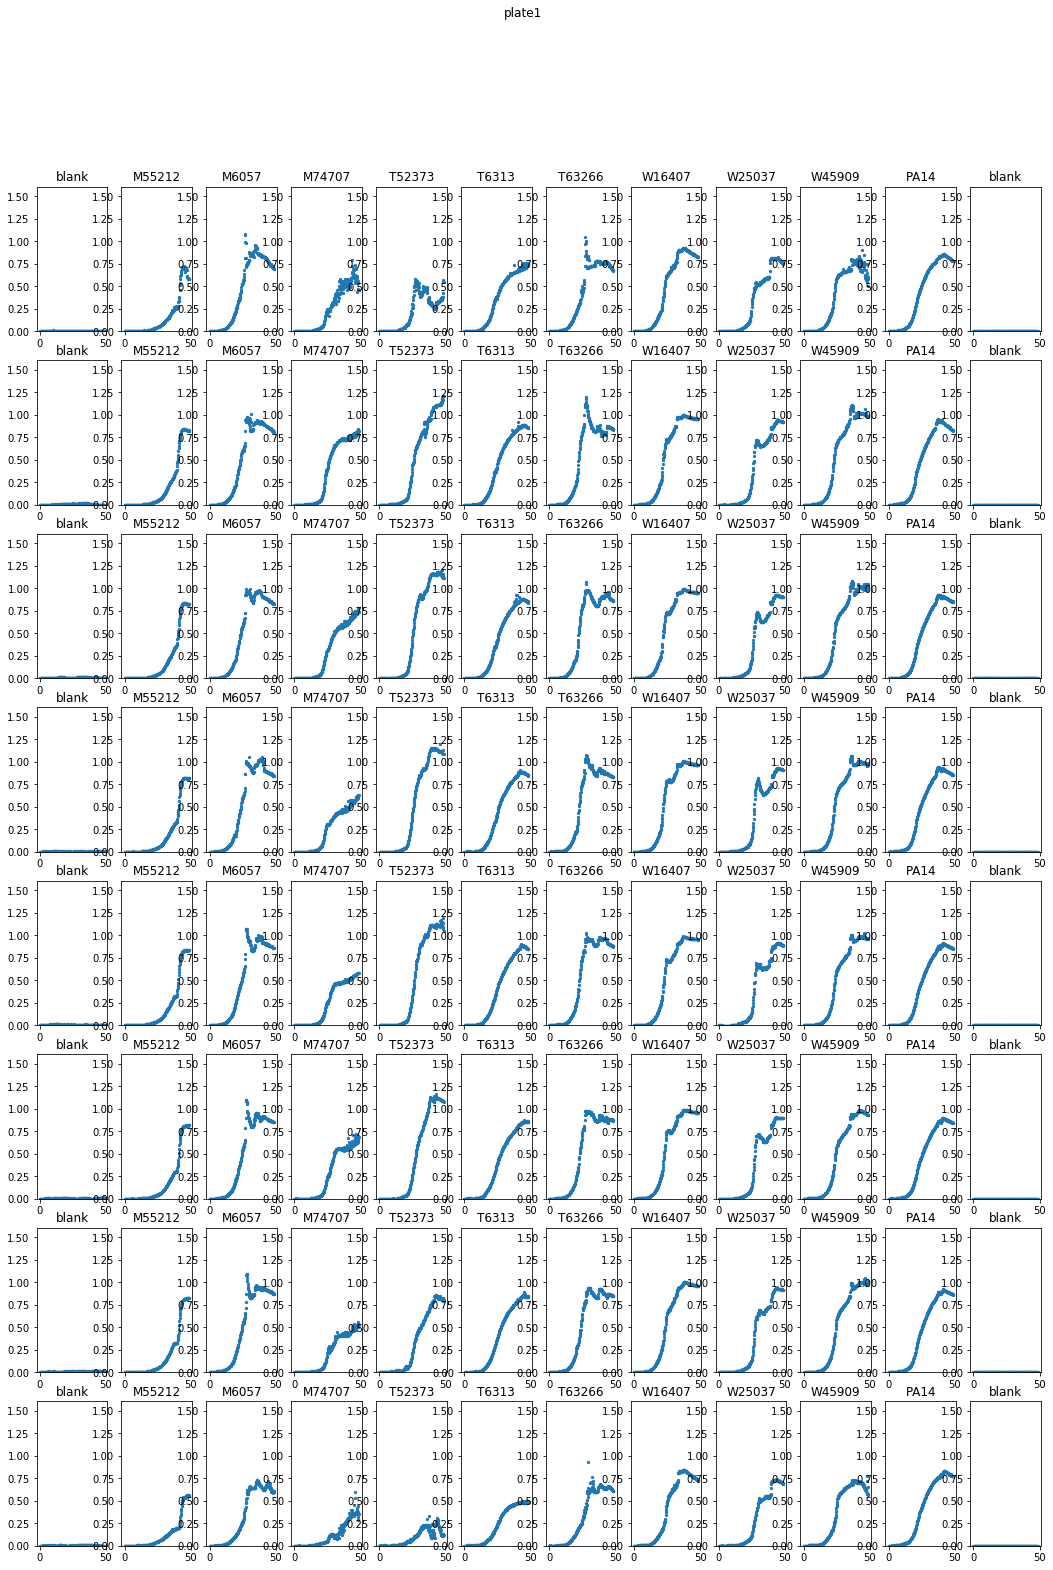

In [77]:
# Plate 4

%run biologFunctions.ipynb
G4 = pd.read_excel(filedir+gcExcels[3],header=None, names=None)
G4 = SinglePlate.processExcel(G4)
G4 = SinglePlate.subtractFirstPoint(G4)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('M55212', 'M6057', 'M74707', 'T52373', 'T6313', 'T63266', 'W16407', 'W25037','W45909', 'PA14')
G4 = SinglePlate.renameWellByRowCol(G4, row1,['1', '12'], 'blank')
G4 = SinglePlate.renameWellByRowCol(G4, row1,'2', strains[0])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'3', strains[1])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'4', strains[2])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'5', strains[3])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'6', strains[4])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'7', strains[5])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'8', strains[6])
G4 = SinglePlate.renameWellByRowCol(G4, row1,'9', strains[7])
G4 = SinglePlate.renameWellByRowCol(G4, row1, ['10'], strains[8])
G4 = SinglePlate.renameWellByRowCol(G4, row1,['11'], strains[9])

SinglePlate.plotRawData(G4, 'plate1')

In [78]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG4=G4.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G4, s, col2keep)
    newG4=pd.concat([newG4, sf],axis=1)


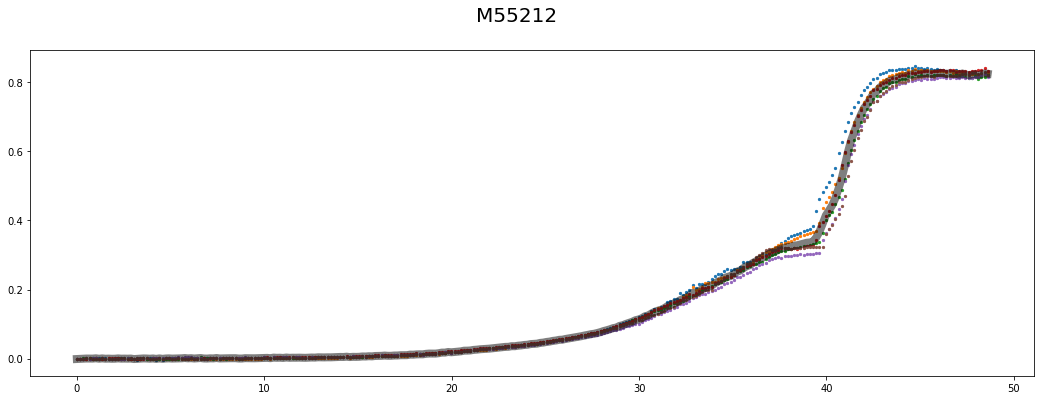

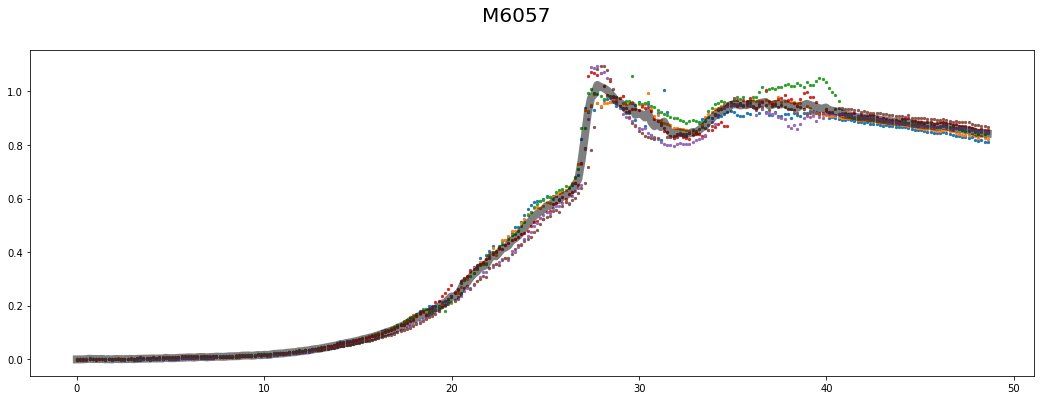

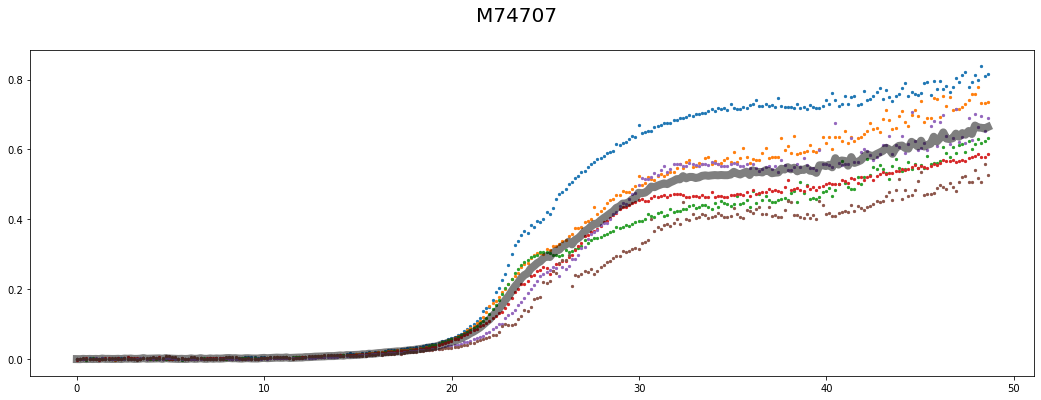

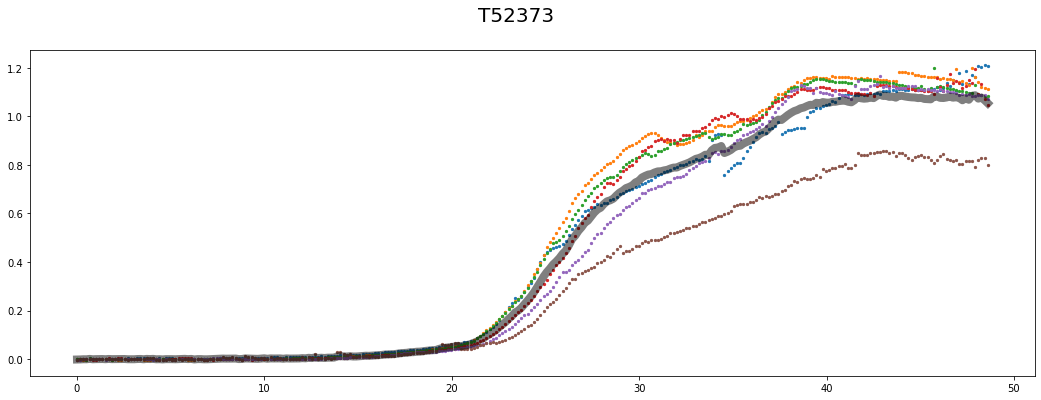

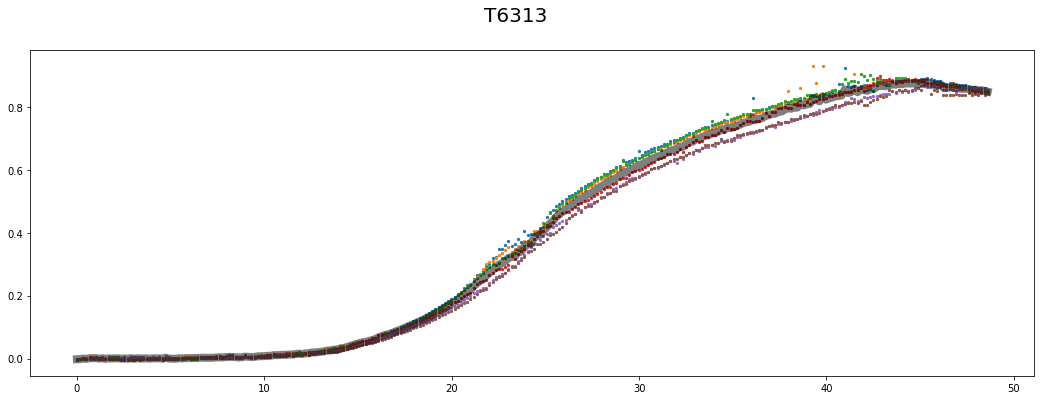

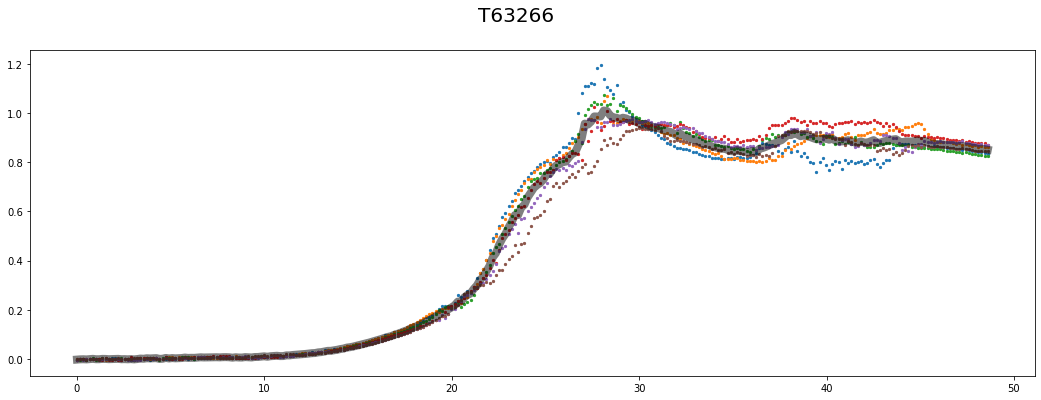

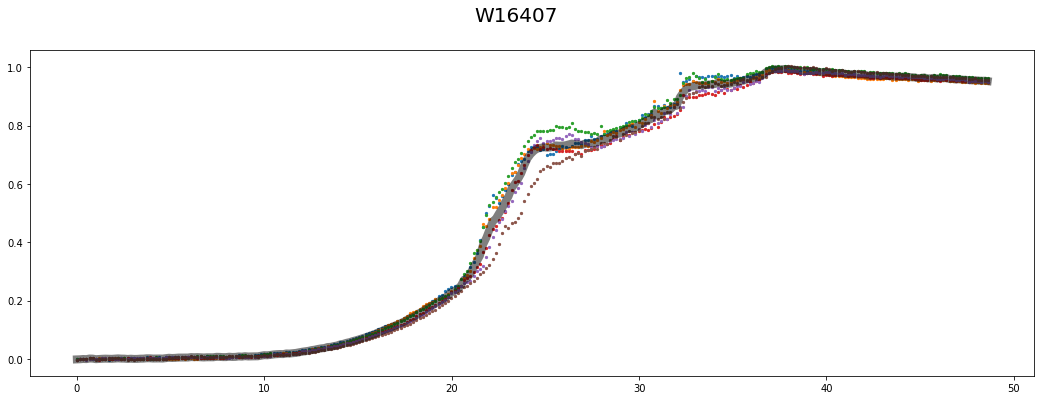

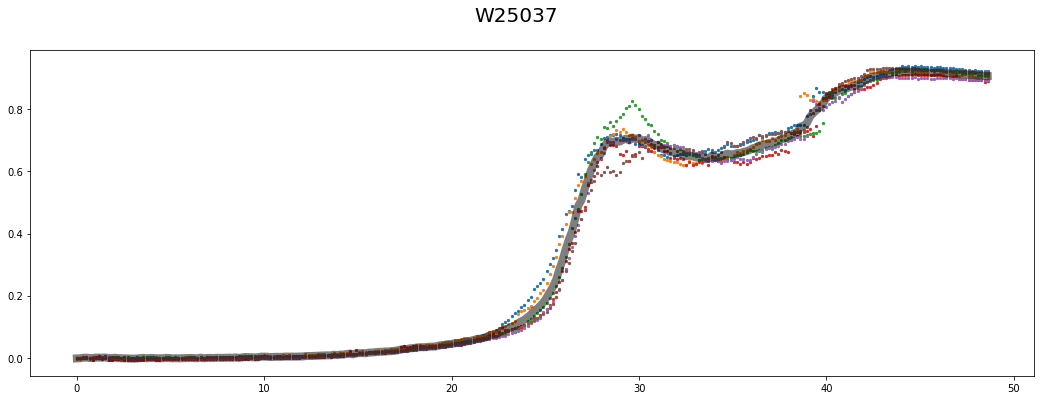

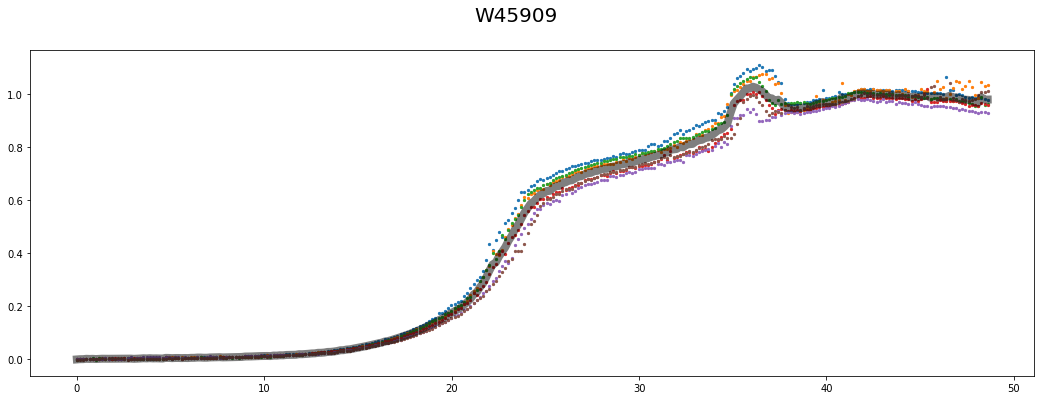

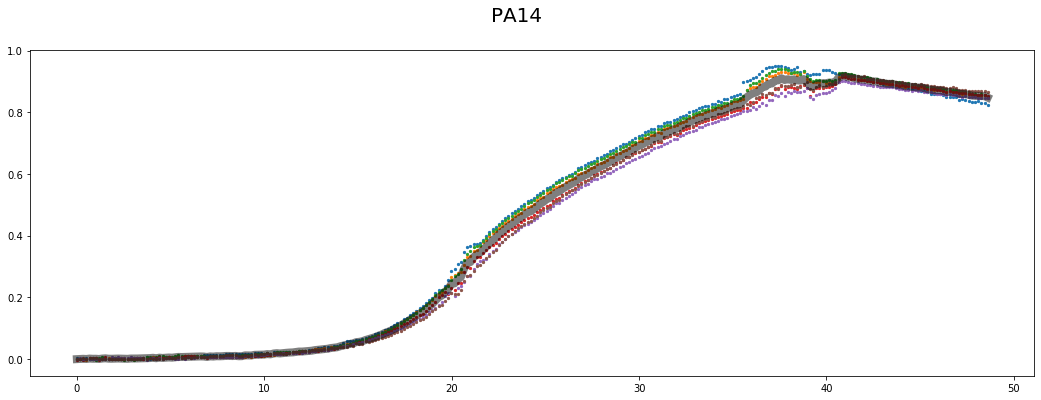

In [79]:
## print one figure for all replicates of each strain
dt = newG4.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG4.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [80]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[3])+"mean.xlsx")

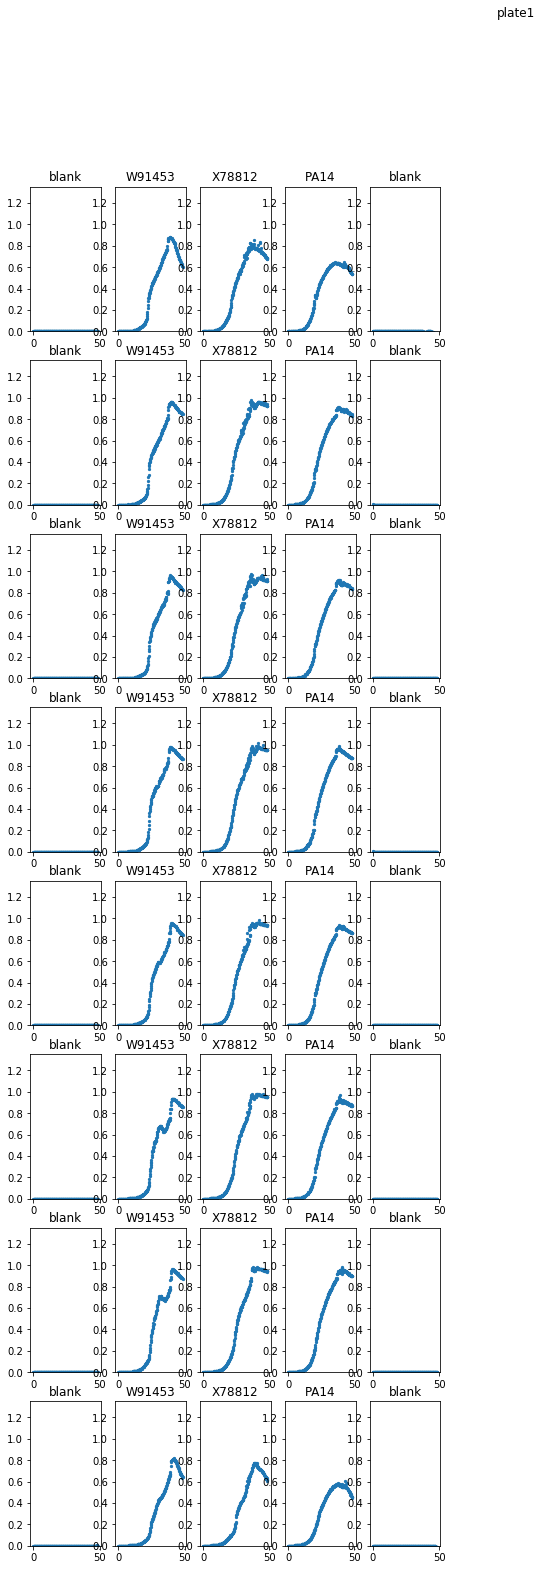

In [81]:
# Plate 5

%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[4],header=None, names=None)
G1 = SinglePlate.processExcel(G1)
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('W91453', 'X78812', 'PA14')
G1 = SinglePlate.renameWellByRowCol(G1, row1,['1', '5'], 'blank')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[2])

SinglePlate.plotRawData_2(G1, 'plate1', 5)

In [82]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)


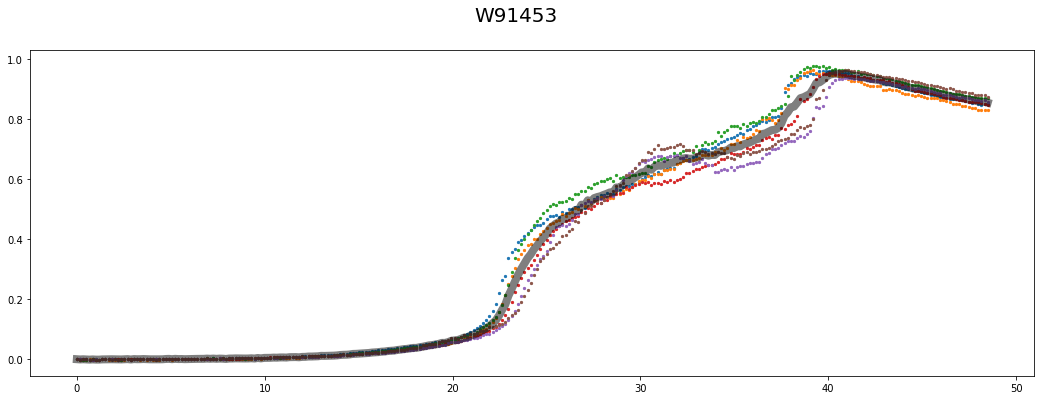

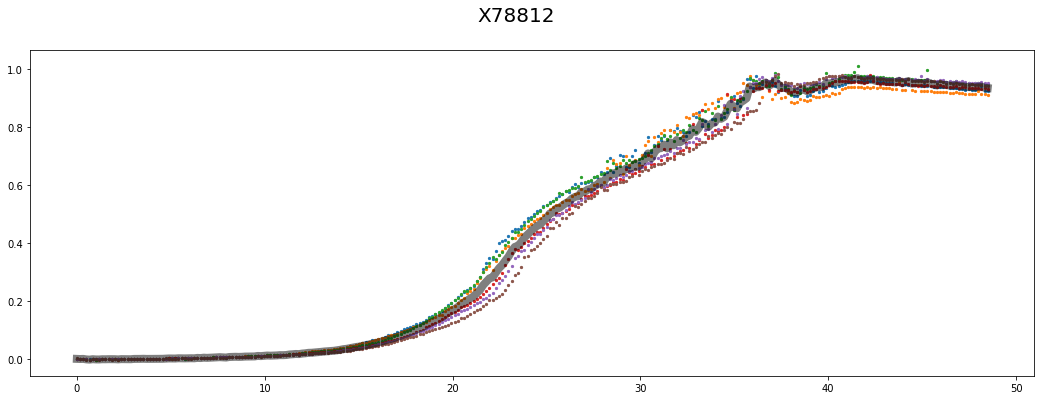

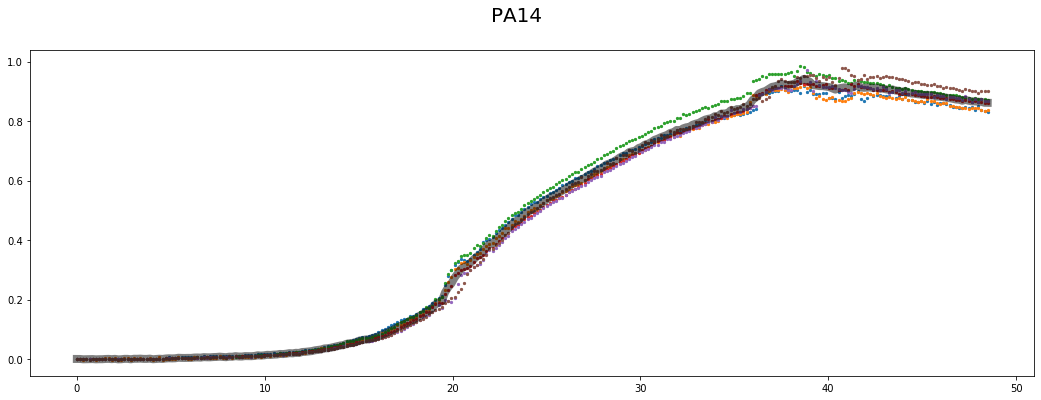

In [83]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [84]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[4])+"mean.xlsx")

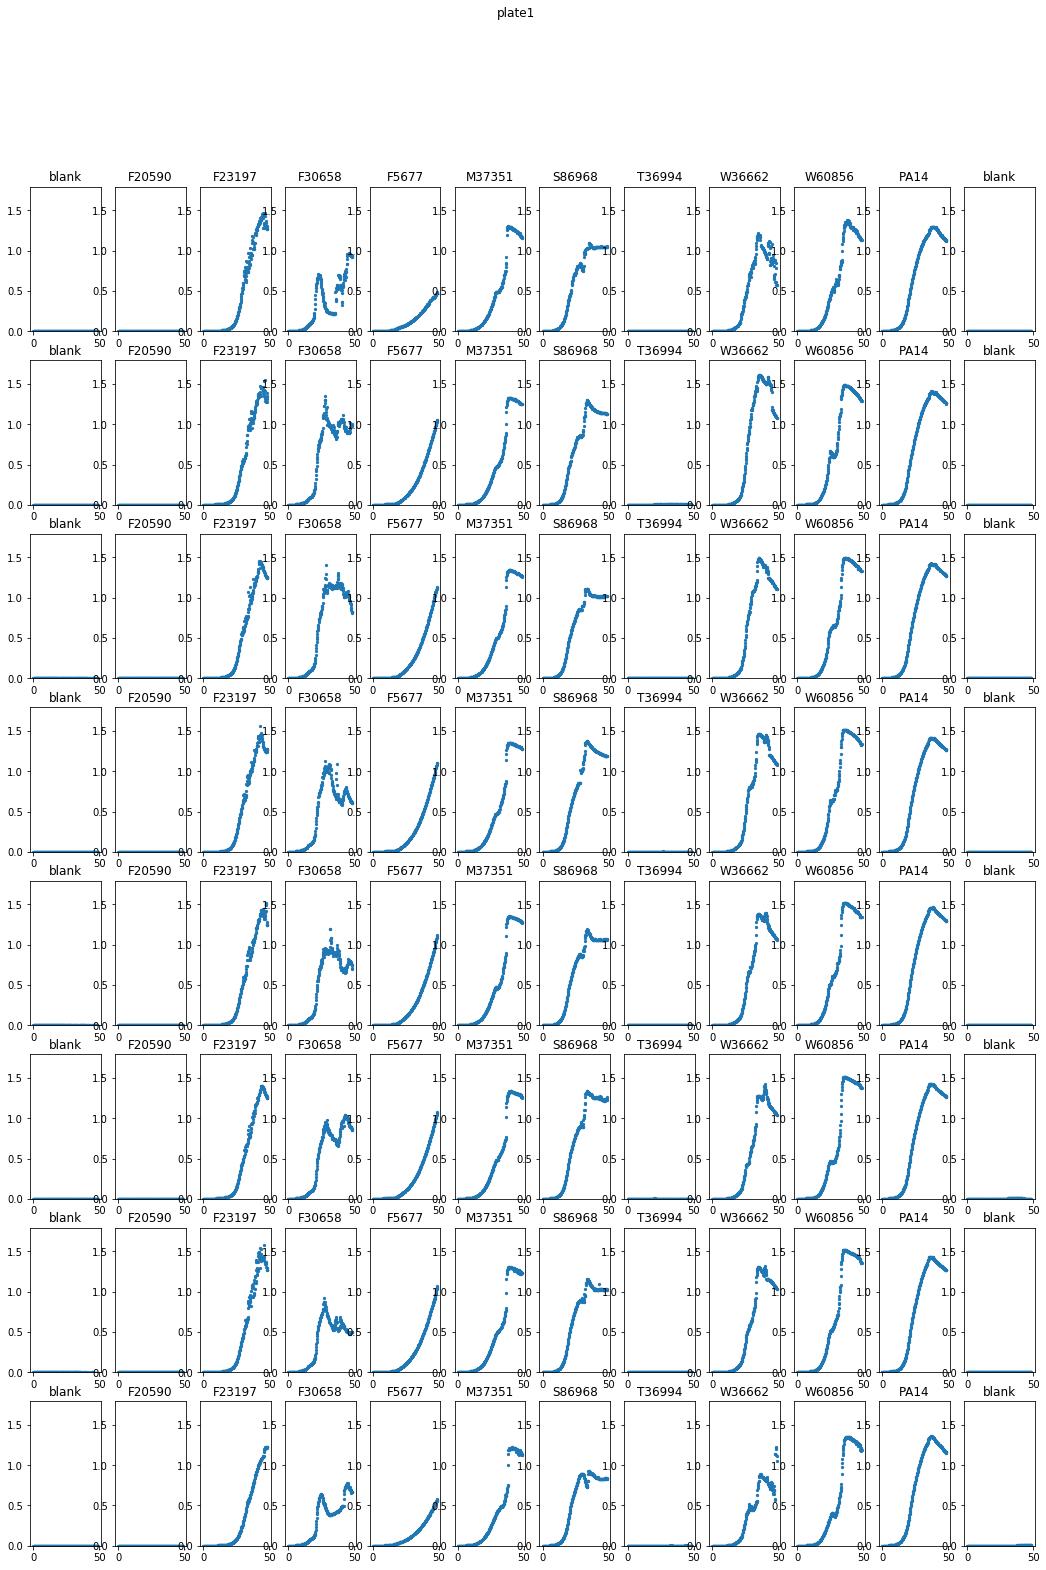

In [85]:
# Plate 6
%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[5],header=None, names=None)
G1 = SinglePlate.processExcel(G1,'spark')
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('F20590', 'F23197', 'F30658', 'F5677', 'M37351', 'S86968', 'T36994', 'W36662','W60856', 'PA14')
G1 = SinglePlate.renameWellByRowCol(G1, row1,['1', '12'], 'blank')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[2])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'5', strains[3])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'6', strains[4])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'7', strains[5])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'8', strains[6])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'9', strains[7])
G1 = SinglePlate.renameWellByRowCol(G1, row1, ['10'], strains[8])
G1 = SinglePlate.renameWellByRowCol(G1, row1,['11'], strains[9])

SinglePlate.plotRawData(G1, 'plate1')

In [86]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)


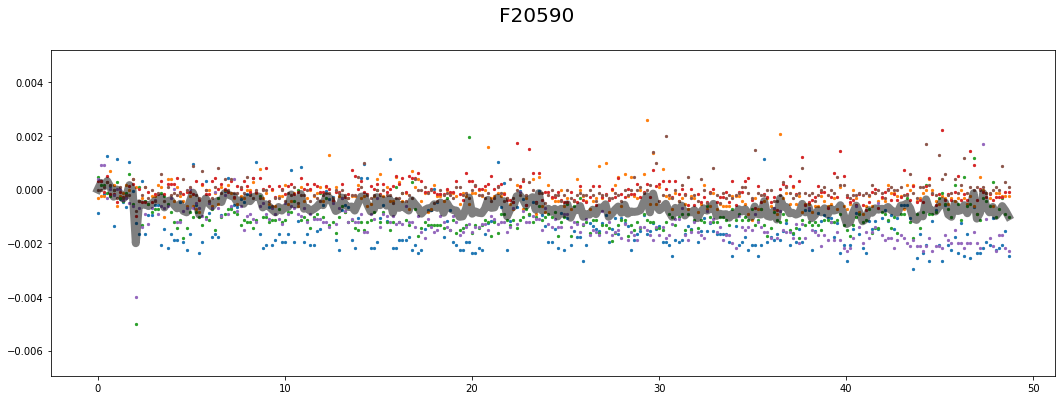

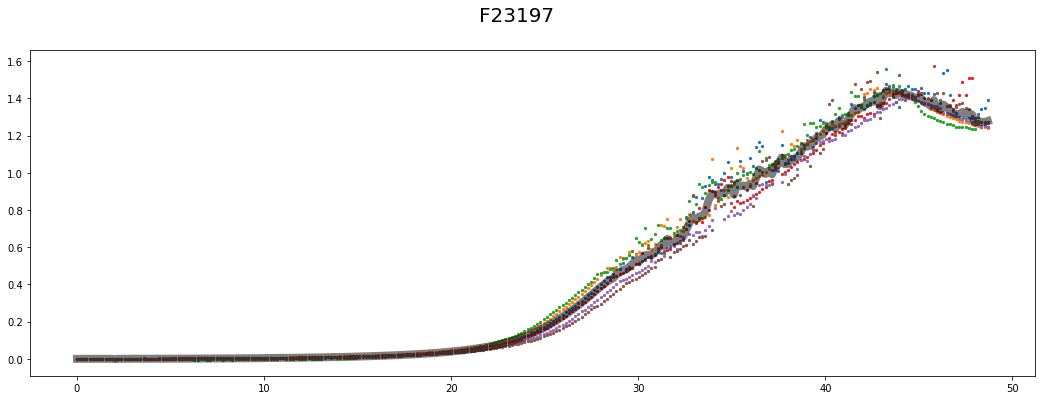

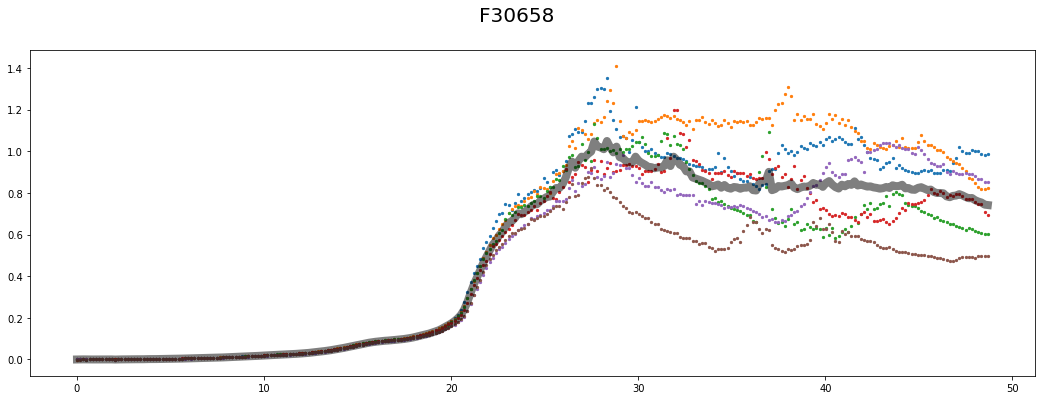

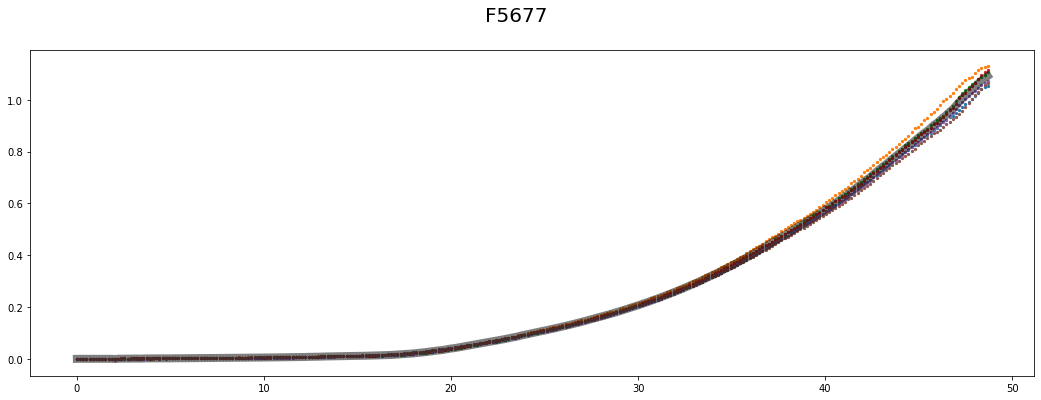

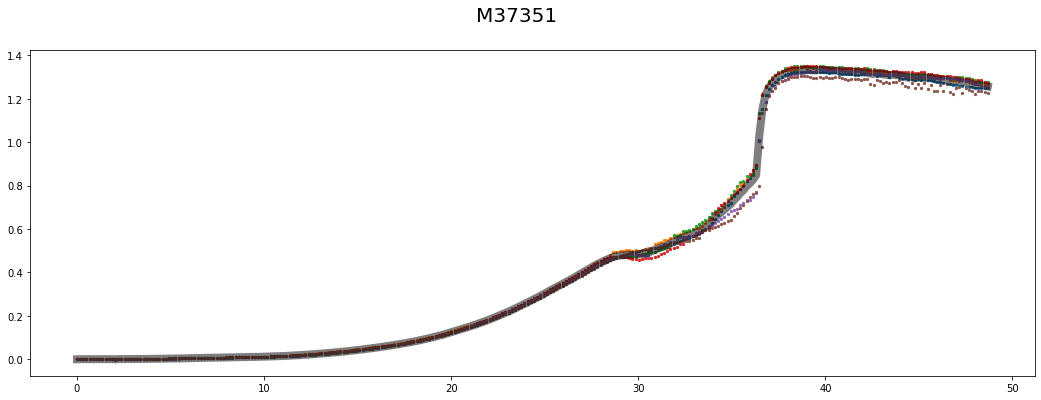

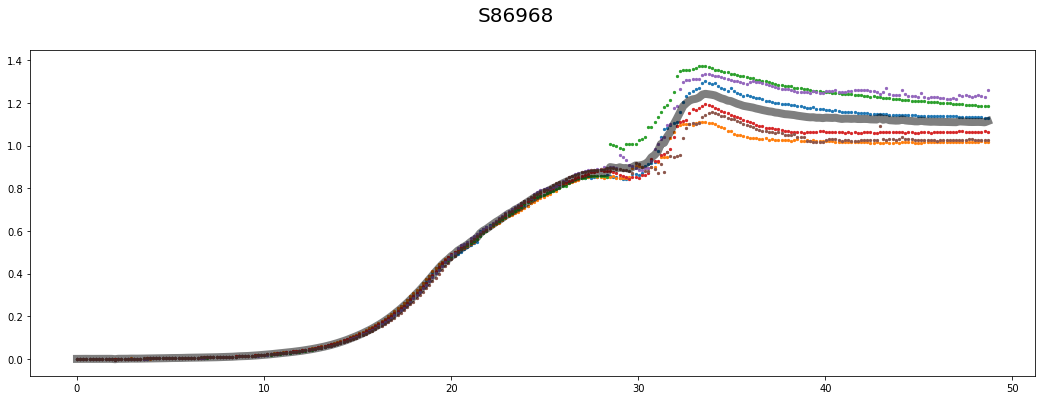

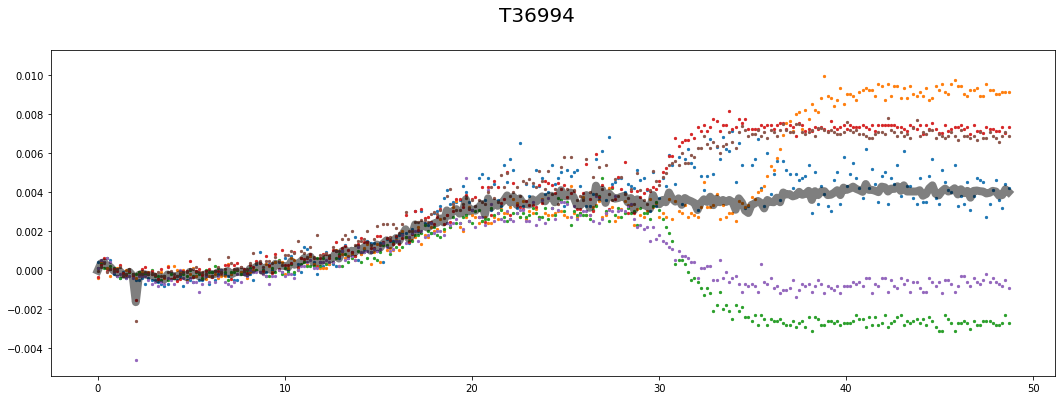

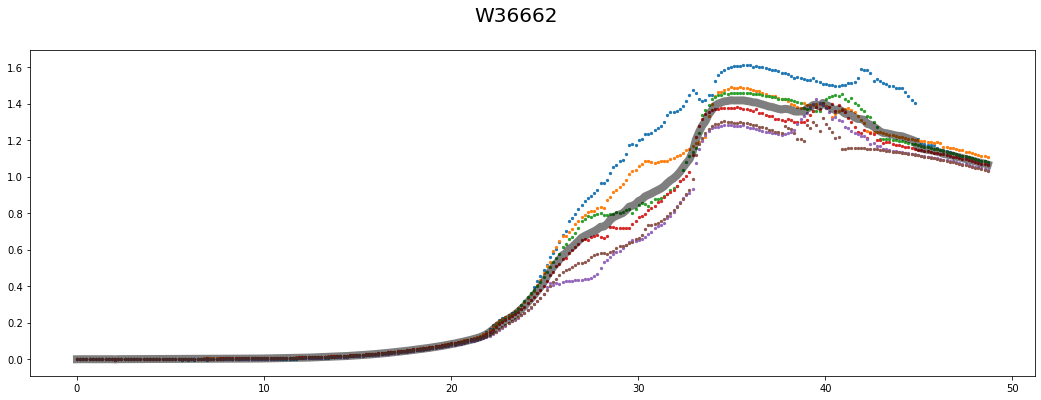

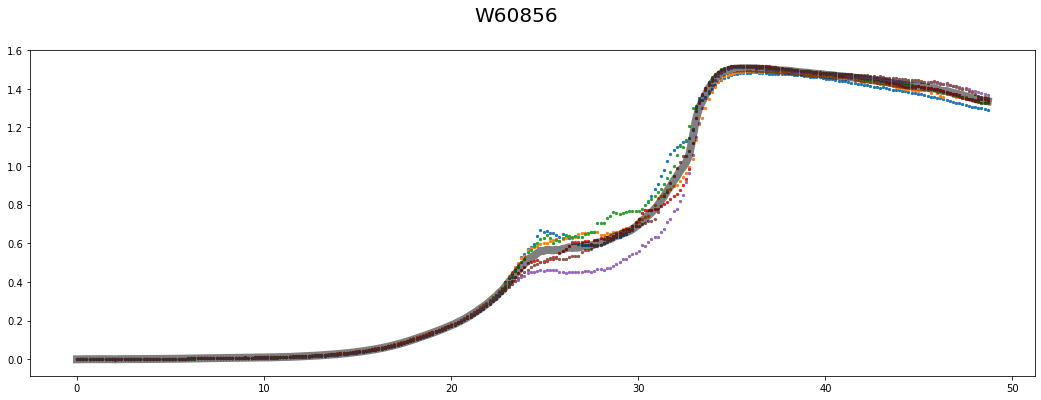

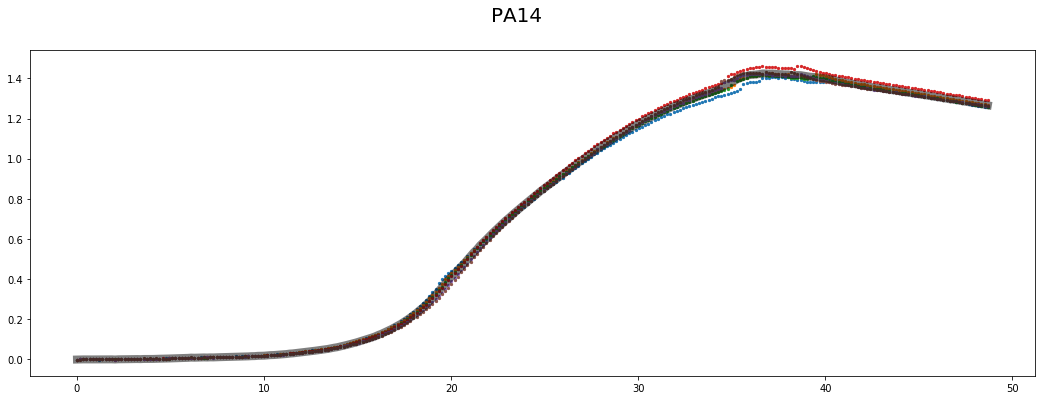

In [87]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [88]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[5])+"mean.xlsx")

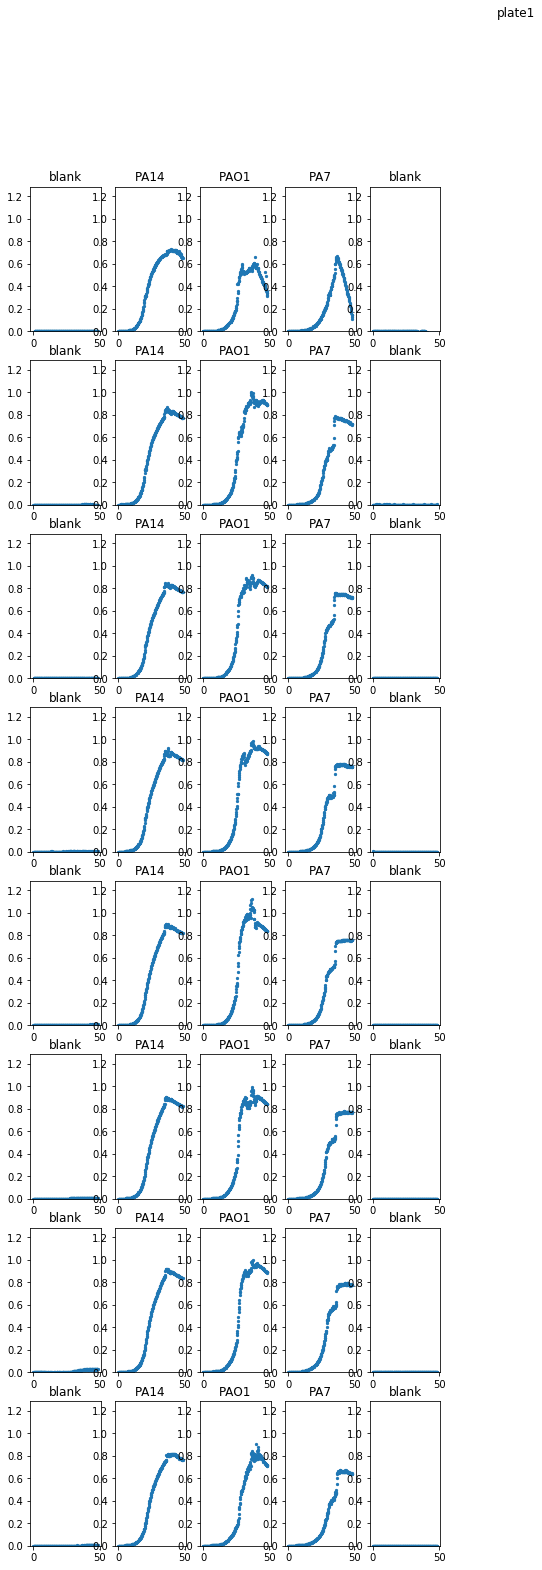

In [89]:
# Plate 7

%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[6],header=None, names=None)
G1 = SinglePlate.processExcel(G1)
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('PA14', 'PAO1', 'PA7')
G1 = SinglePlate.renameWellByRowCol(G1, row1,['1', '5'], 'blank')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[2])

SinglePlate.plotRawData_2(G1, 'plate1', 5)

In [90]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)


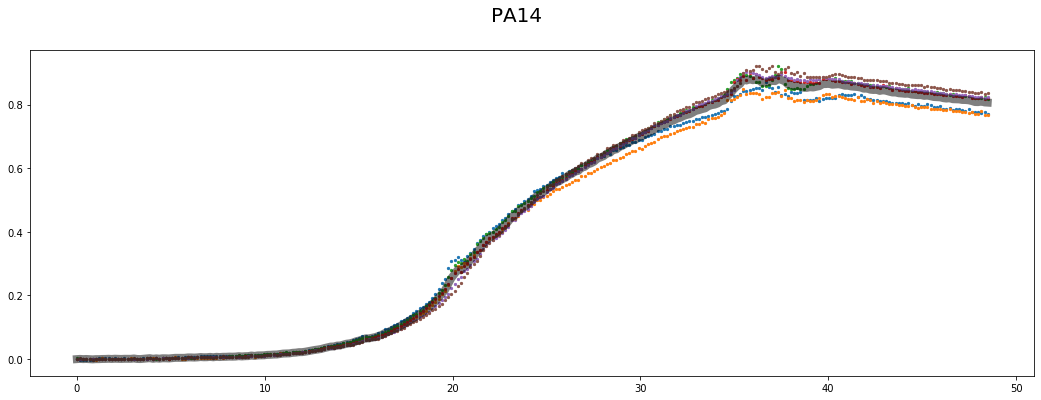

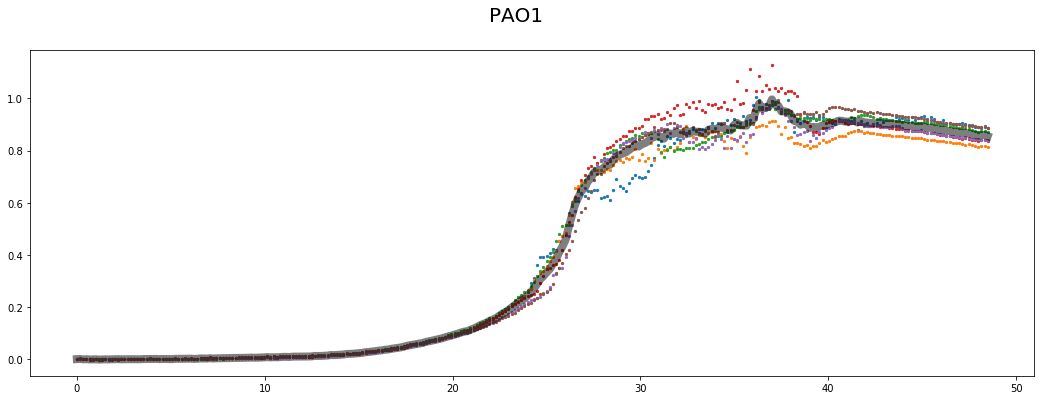

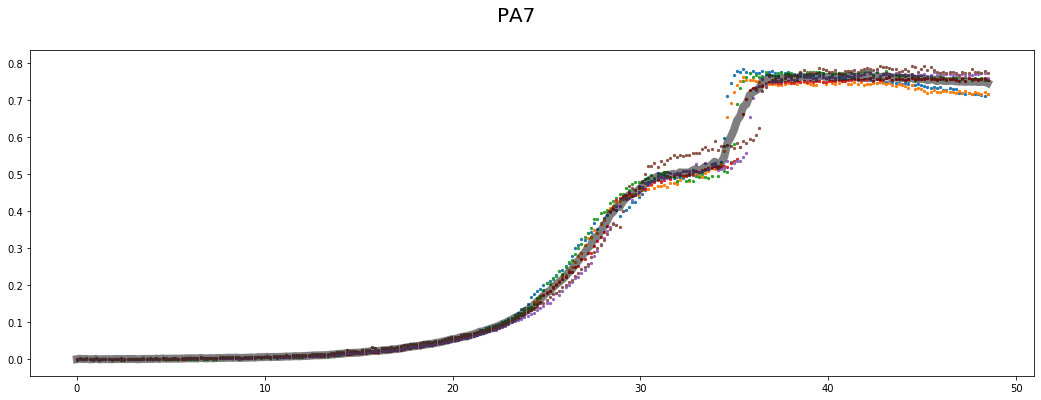

In [91]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [92]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[6])+"mean.xlsx")

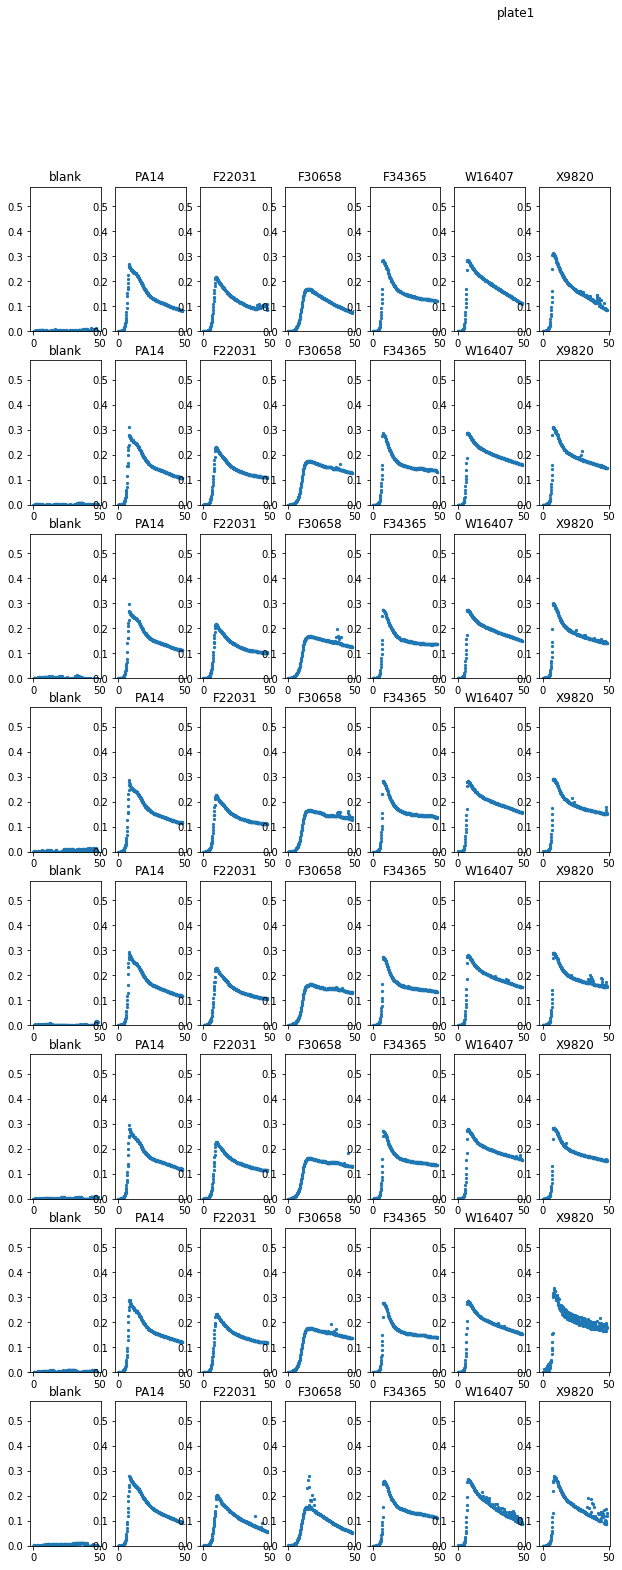

In [93]:
# Plate 8 (succinate synthetic medium)
%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[7],header=None, names=None)
G1 = SinglePlate.processExcel(G1)
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('PA14', 'F22031', 'F30658', 'F34365', 'W16407', 'X9820')
G1 = SinglePlate.renameWellByRowCol(G1, row1,['1', '8'], 'blank')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[2])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'5', strains[3])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'6', strains[4])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'7', strains[5])

SinglePlate.plotRawData_2(G1, 'plate1', 7)

In [94]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)


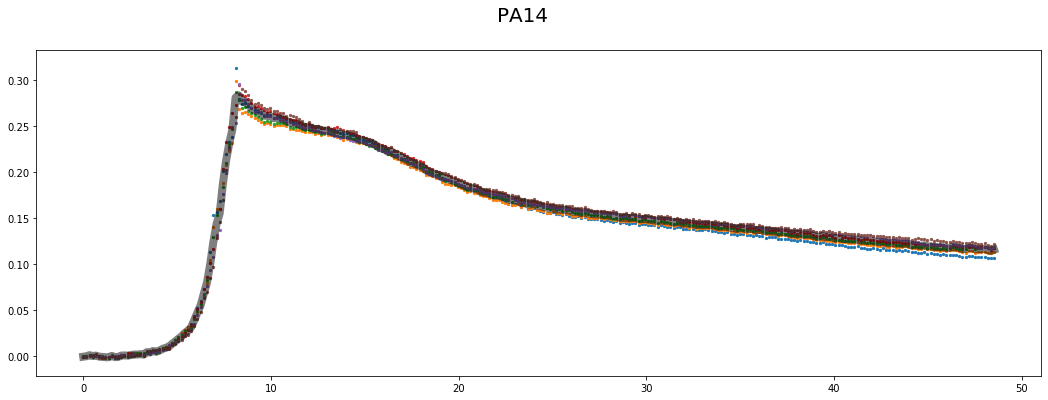

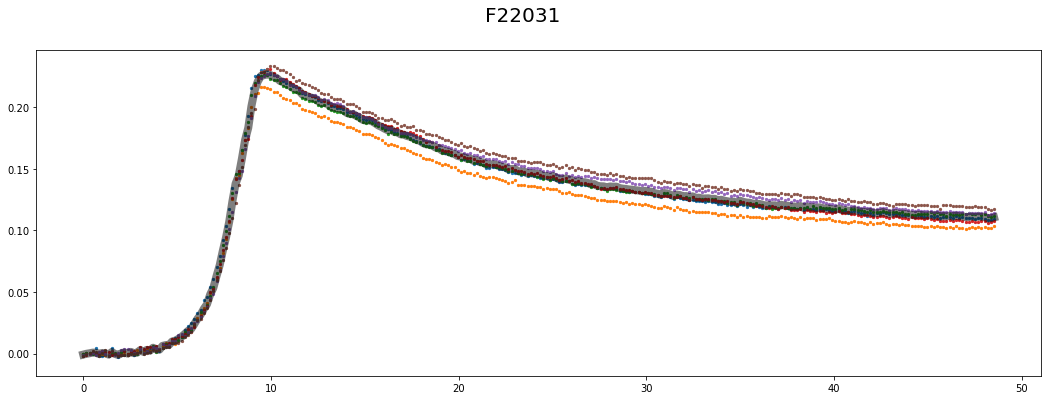

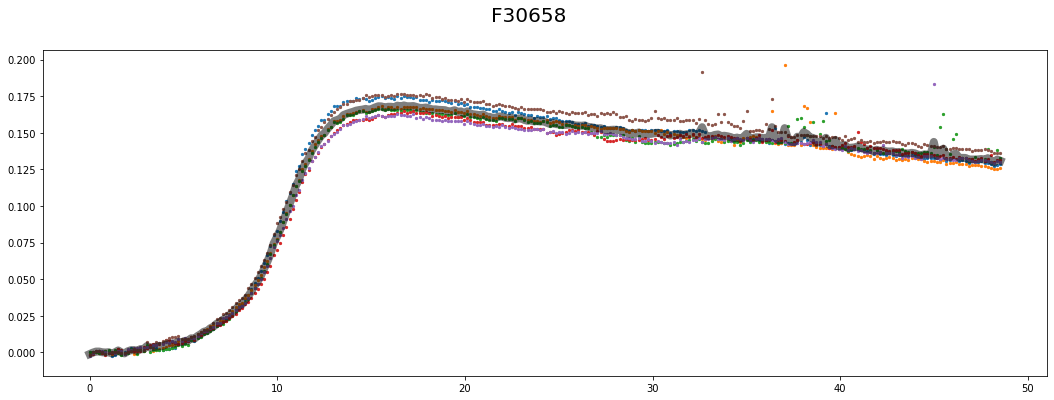

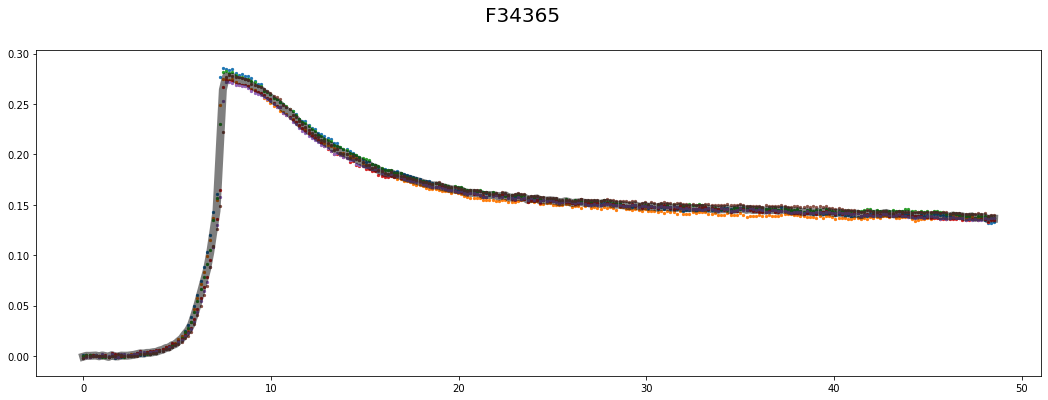

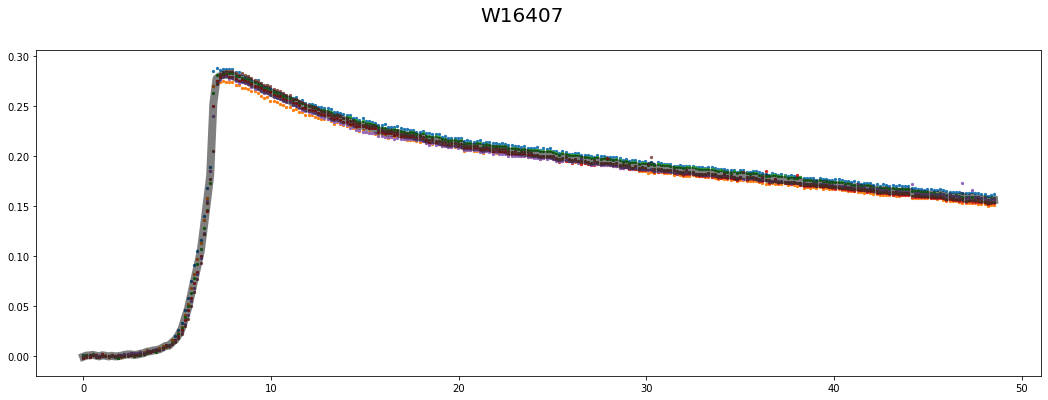

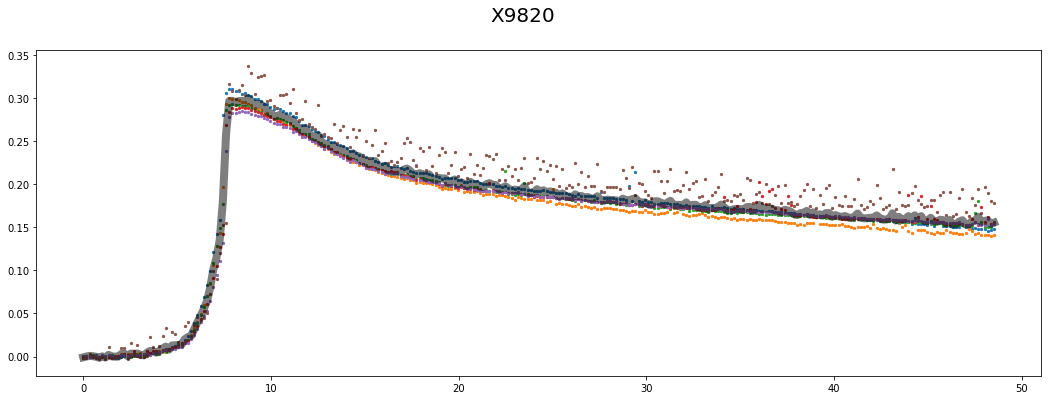

In [95]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [96]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[7])+"mean.xlsx")

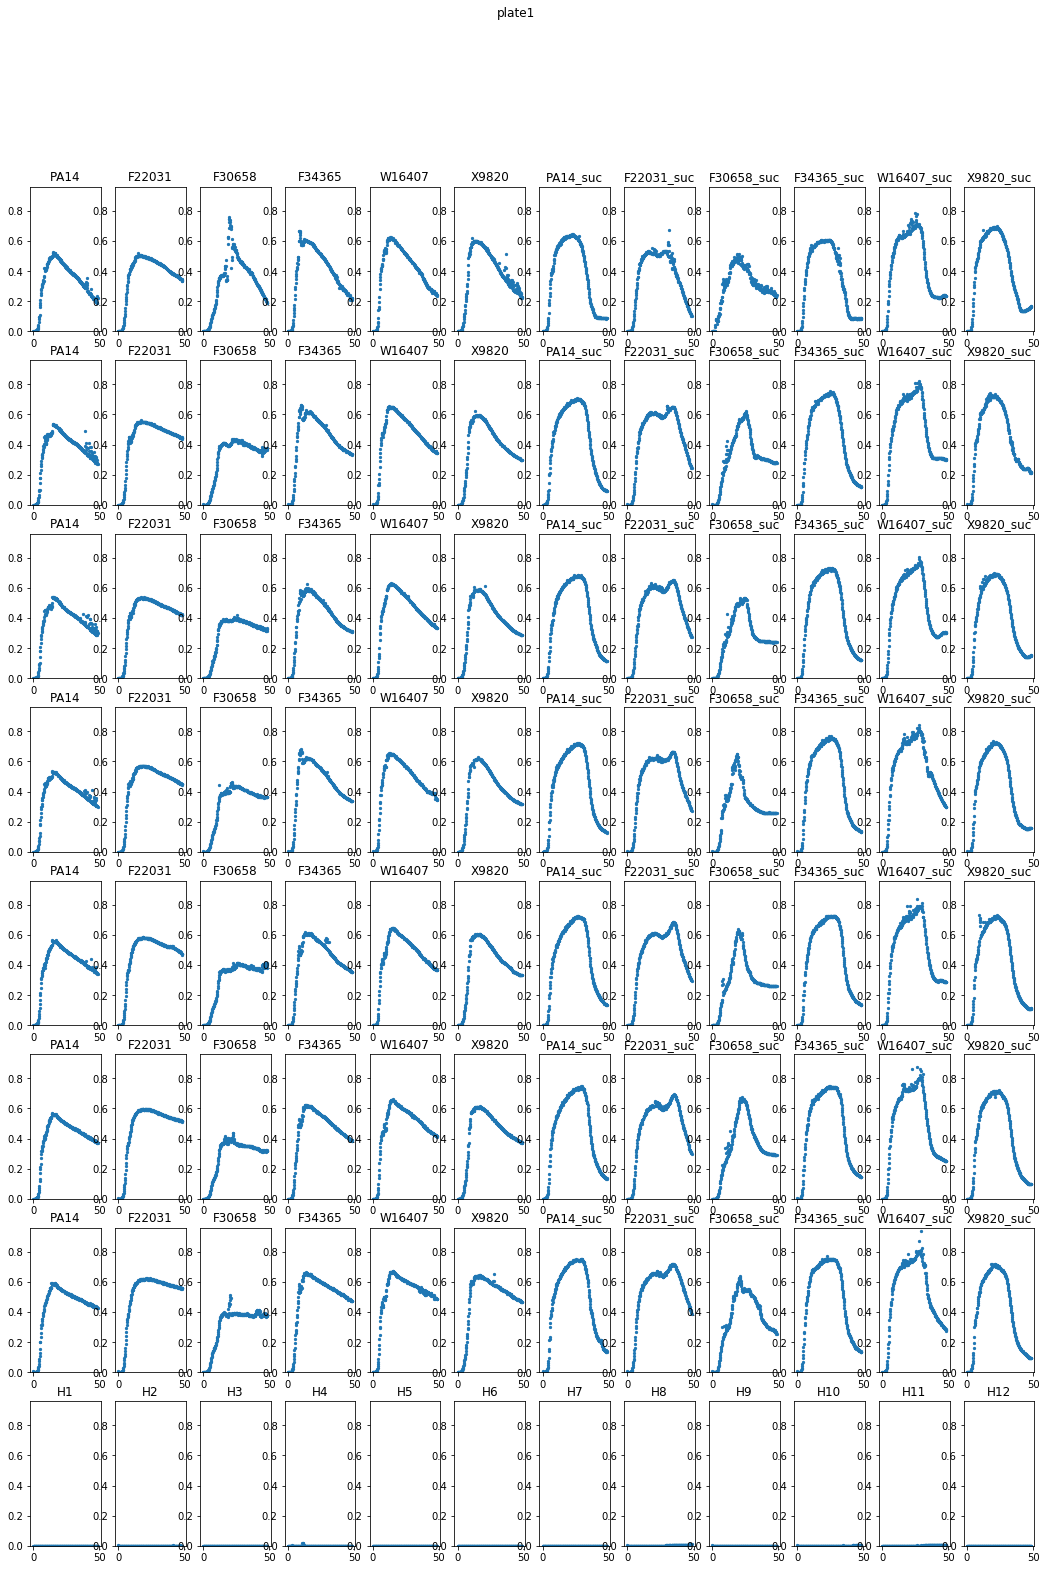

In [97]:
# Plate 9 (cas & cas + succ)
%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[8],header=None, names=None)
G1 = SinglePlate.processExcel(G1)
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
strains =('PA14', 'F22031', 'F30658', 'F34365', 'W16407', 'X9820', 'PA14_suc', 'F22031_suc','F30658_suc', 'F34365_suc', 'W16407_suc', 'X9820_suc')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'1', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[2])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[3])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'5', strains[4])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'6', strains[5])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'7', strains[6])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'8', strains[7])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'9', strains[8])
G1 = SinglePlate.renameWellByRowCol(G1, row1, ['10'], strains[9])
G1 = SinglePlate.renameWellByRowCol(G1, row1,['11'], strains[10])
G1 = SinglePlate.renameWellByRowCol(G1, row1,['12'], strains[11])

SinglePlate.plotRawData(G1, 'plate1')

In [98]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)

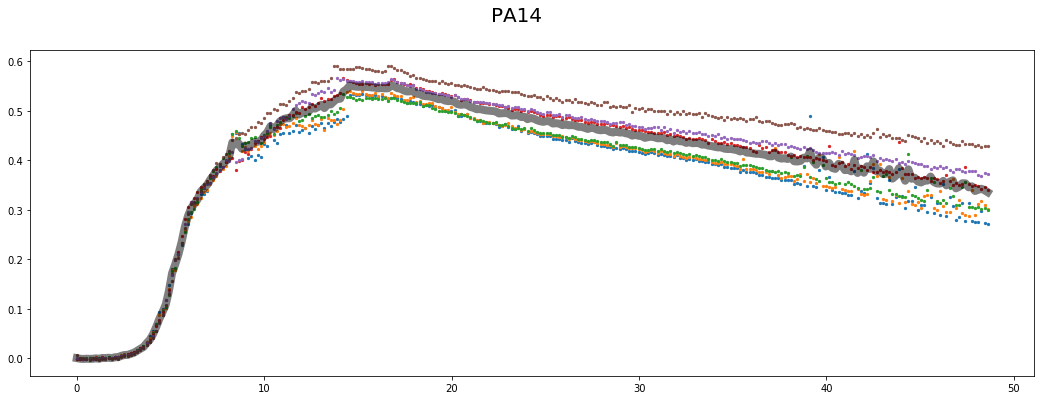

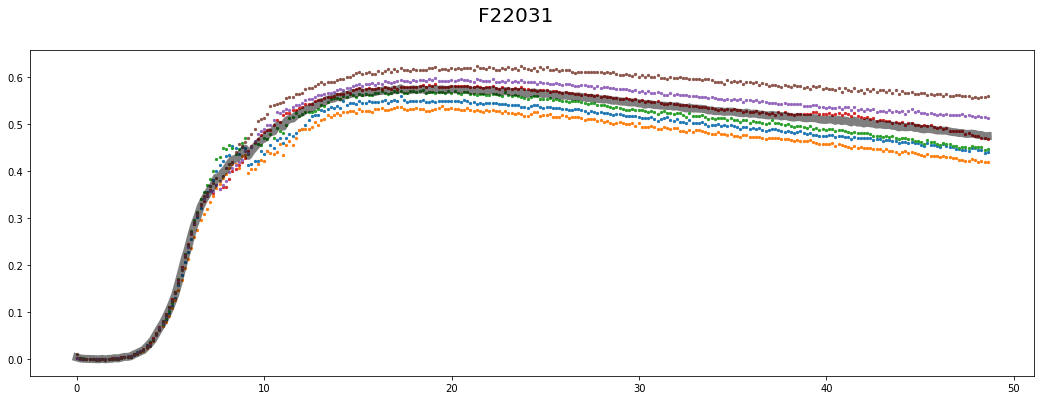

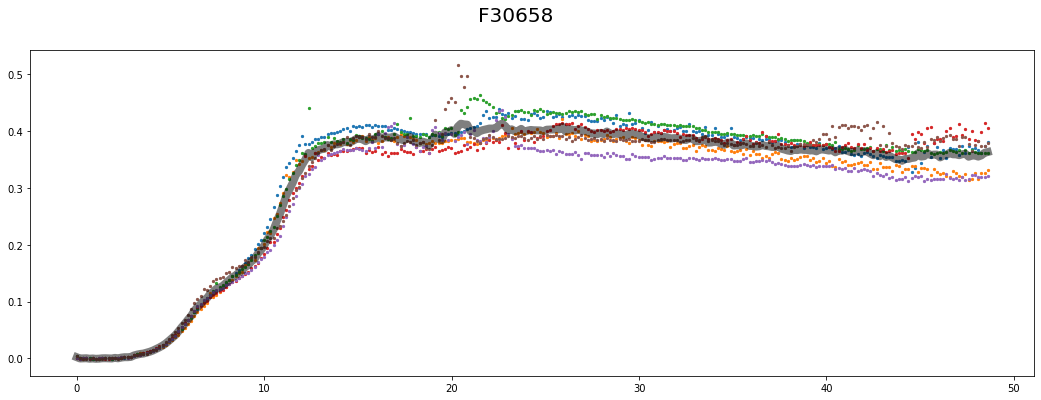

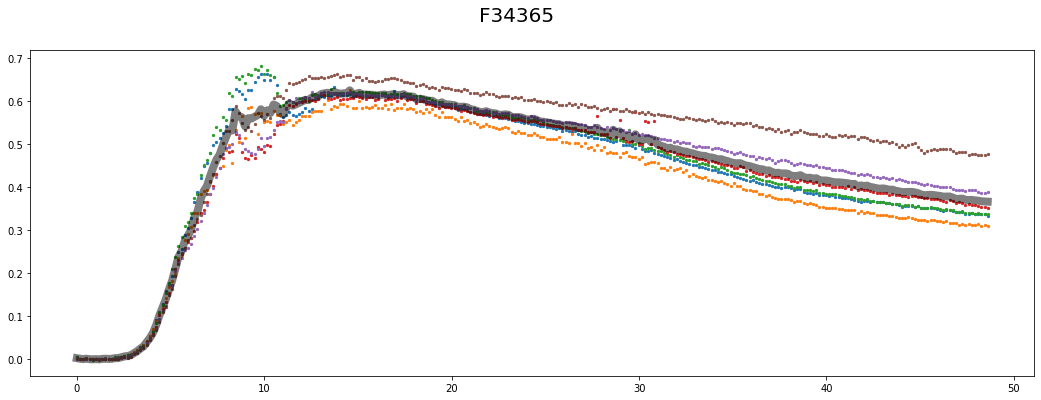

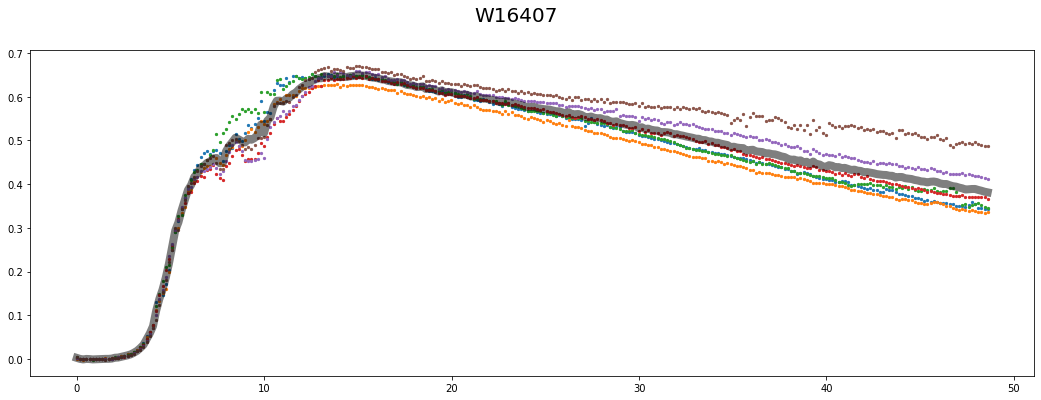

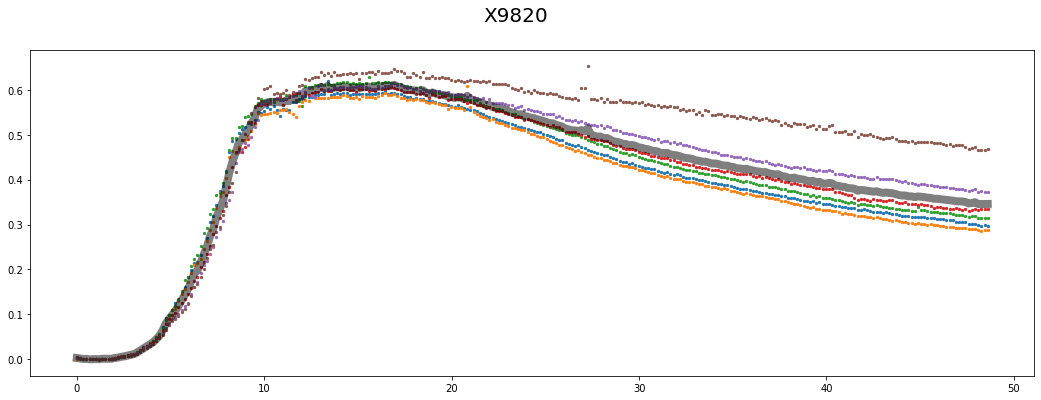

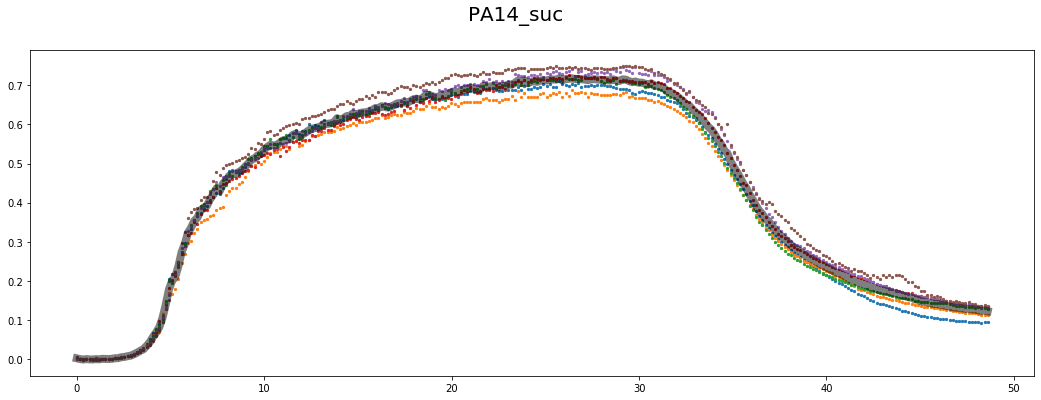

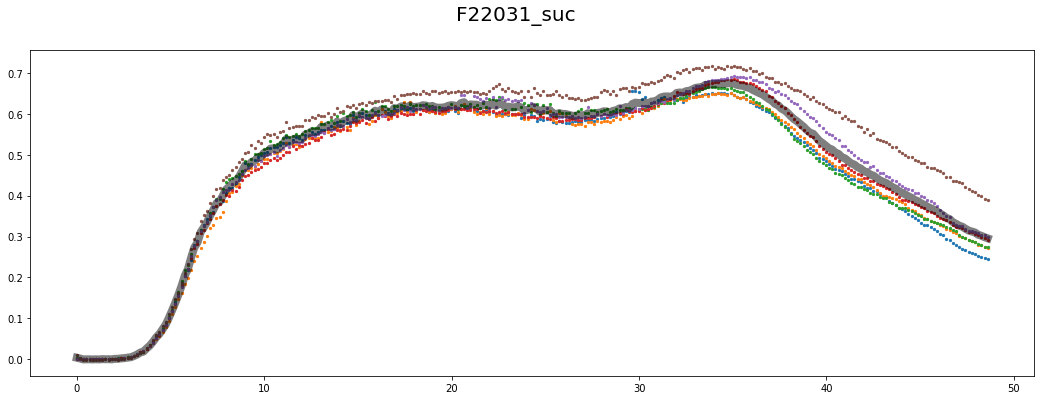

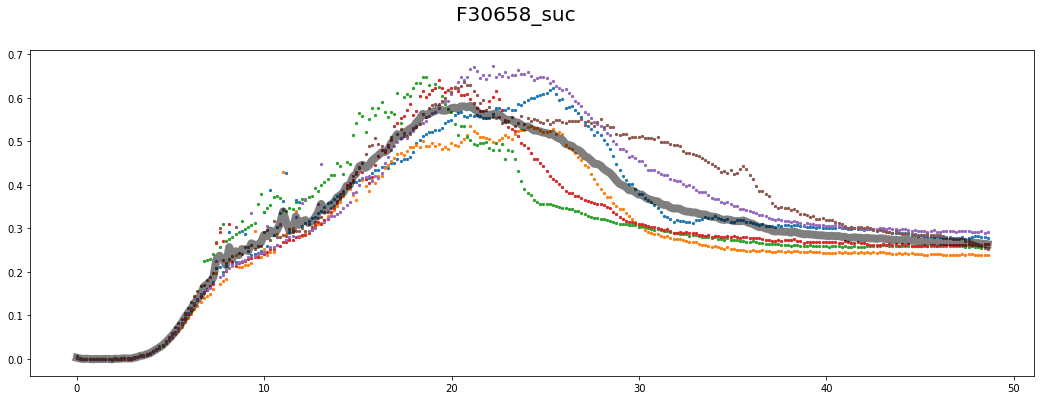

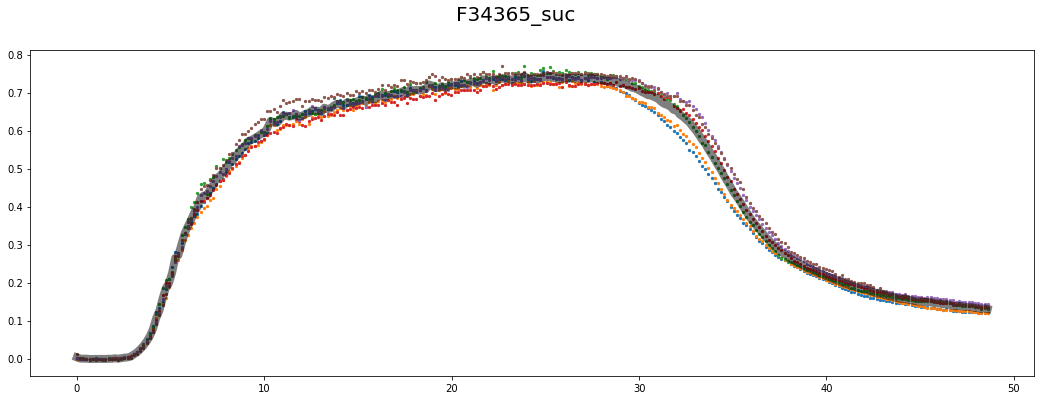

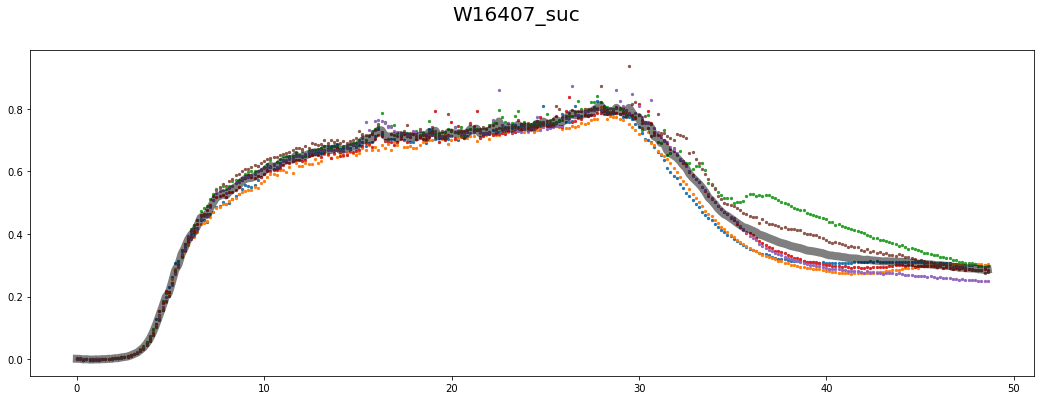

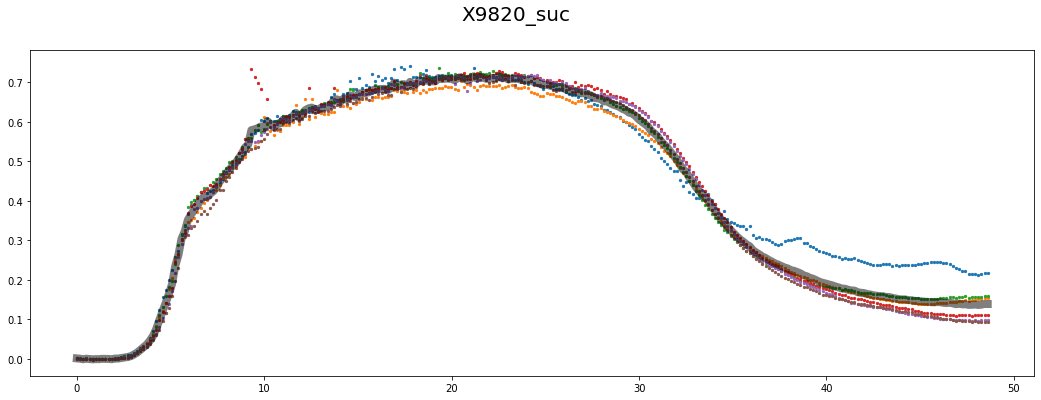

In [99]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [100]:
import re
T1.to_excel(re.sub('.xlsx', '_', gcExcels[8])+"mean.xlsx")